In [89]:
%%html
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-162045285-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-162045285-1');
</script>


# Covid-19 Analysis

## Presentazione del Report
Analisi della situazione italiana del Covid-19 basata sui dati della Protezione Civile. I dati sono aggiornati alle 18.30 e sono recuperati dal repository https://github.com/pcm-dpc/COVID-19. Per aggiornare i dati rilanciare il presente Notebook.

> Questo Report è stato sviluppando usando Jupyter Lab un tool che permette la scrittura di codice Python tramite Browser. 
Il codice sorgente è disponibile all'indirizzo https://github.com/pasalino/Covid-19-PyAnalysis .

> **Sono gradite le Star (stelline in alto a destra della pagina).** <br/>
> Sono graditi commenti e suggerimenti che potete inviare all'indirizzo pasalino@gmail.com oppure sulla pagina https://github.com/pasalino/Covid-19-PyAnalysis/issues .<br/>
> Qui tutte le nuove funzionalità e la Roadmap del report https://pasalino.github.io/Covid-19-PyAnalysis



## Disclosure e scarico di responsabilità

Questo report non vuole sostituirsi alle fonti ufficiali, ma ne va a completamento. Non consideratelo una fonte ufficiale ma una lettura dei dati ufficiali da un punto di vista matematico.
Non mi ritengo responsabile della diffusione di questo report se non nei limiti delal condivisione di pensiero atta a comprendere meglio i dati. I dati in questo report, non sono analizzati da esperti di settore e quindi proni ad errori.
Potrebbero esserci errori e inesattezze nel codice che produce i dati. Attraverso la pagina sopra indicata è possibile indicarle.

## Indice

In [90]:
%%html
<div id="toc"></div>

In [91]:
%%javascript
$( document ).ready(function() {
    const l = $("<a href='#Indice' class='link_index'> ^ Torna su</a>");
    l.insertAfter('h2');
    l.insertAfter('h3');
    l.insertAfter('h4');
    console.log( "ready!" );
});

<IPython.core.display.Javascript object>

In [92]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [93]:
import os
import subprocess
import pandas as pd 
import datetime
import matplotlib
import math
import numpy as np
from scipy import stats
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt
from matplotlib.dates import date2num

In [94]:
PROTEZIONE_CIVILE_REPO = 'git@github.com:pcm-dpc/COVID-19.git'
CURRENT_DIR = os.path.join(os.getcwd())
DATA_DIR = os.path.join(os.getcwd(),'data')
REPO_DIR = os.path.join(os.getcwd(),DATA_DIR,'repo')

In [95]:
COLORS = ['tomato', 'seagreen', 'magenta', 'deepskyblue', 'plum', 'orange', 'royalblue',]
COL_TOTALE_CASI = '#1376f7'
COL_ATTUALMENTE_POSITIVI = '#d30202'
COL_DECEDUTI = '#8D09B3'
COL_DIFF_POSITIVI = '#d11212'
COL_GUARITI = 'deepskyblue'
COL_TOT_RICOVERATI = '#FF352D'
COL_ISOLAMENTO_DOMICILIARE = '#FDCEB5'
COL_TERAPIA_INTENSIVA = "#B34220"
COL_RICOVERATI ='#FF7554'
COL_TAMPONI= '#bce079'

COL_AVG= 'green'

NAME_LABELS= {
    'data':'DATA', 
    'ricoverati_con_sintomi':'RICOVERATI', 
    'terapia_intensiva':'TERAPIA INT.',
    'totale_ospedalizzati':'TOT. RICOV.',
    'isolamento_domiciliare':'ISOLAME. DOM.',
    'totale_attualmente_positivi':'TOT. POSITIVI',
    'nuovi_attualmente_positivi':'DIFF. POSITIVI',
    'totale_nuovi_positivi':'TOT. NUOVI POS.',
    'dimessi_guariti':'GUARITI',
    'deceduti':'DECEDUTI',
    'totale_casi':'CASI TOTALI',
    'tamponi':'TAMPONI'    
}

In [96]:
if not os.path.isdir(REPO_DIR):
    p = subprocess.Popen(['git', 'clone', '--single-branch', '-b', 'master', PROTEZIONE_CIVILE_REPO, REPO_DIR])
    p.wait()
else:
    os.chdir(REPO_DIR)
    p = subprocess.Popen(['git', 'pull'])
    p.wait()
    os.chdir(REPO_DIR)
    os.chdir(CURRENT_DIR)

## Articoli di interesse per capire i numeri

* Articolo de Il Sole 24Ore che da un senso ai numeri indicati dalla protezione civile [QUI](https://www.ilsole24ore.com/art/gli-attualmente-contagiati-e-nuovi-positivi-rebus-ogni-sera-ADGG5tF)
* Articolo del Corriere della Sera che ci da una previsione secondo Einaudi Institute for Economincs and Finance (non di settore ma nemmeno degli sprovveduti [QUI](https://www.corriere.it/economia/lavoro/20_marzo_30/coronavirus-italia-quando-si-azzereranno-contagi-previsioni-regione-regione-ae9099dc-7264-11ea-bc49-338bb9c7b205.shtml). 
* Articolo in cui l'Intelligenza Artificiale prova a stimare la fine dell'epidemia [QUI](https://it-blastingnews-com.cdn.ampproject.org/c/s/it.blastingnews.com/cronaca/2020/03/in-casa-fino-a-meta-giugno-a-lavoro-da-settembre-lintelligenza-artificiale-da-le-nuove-previsioni-003100255.amp.html)

## Legenda

* **CASI TOTALI**: Il numero di casi totali riscontrati rispetto al giorno giorno prima. Include guariti e morti
* **DIFF. POSITIVI**: Il numero di casi che sono la differenza dei totali riscontrati in quel giorno meno i guariti e i morti (vedi l'articolo de Il Sole 24ore per capire)
* **ATTUALMENTE POSITIVI**: Il numero dei casi che sono attualmente contagiati

## Ultimo aggiornamento dei dati dalla protezione civile
Questa data è l'ultimo aggiornamento ai dati della protezione civile a cui si riferisce questo Report

In [97]:
os.chdir(REPO_DIR)
p = subprocess.Popen(['git', 'log', '-1', '--format=%cd'], stdout=subprocess.PIPE)
p.wait()
stdout = p.communicate()[0]
out = stdout.decode("utf-8").strip()
display(Markdown(f'**' + out + '**'))
os.chdir(CURRENT_DIR)

**Thu Dec 17 11:04:25 2020 +0100**

In [98]:
plt.rcParams['figure.figsize'] = [20, 7]

In [99]:
import matplotlib.ticker as ticker

def beautify_graph(ax):
    plt.rcParams['figure.figsize'] = [20, 12]
    plt.xticks(rotation=90)
    ax.legend(loc="upper left")
    ax.set_xlabel('Date')
    ax.grid(b=True, which='major', color='#888888', linestyle=':')
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#AAAAAA', linestyle=':', alpha=0.5)
    ax.tick_params(which='both', width=1)
    ax.tick_params(which='both', length=14)
    #ax.locator_params(axis='x', nbins=10)
    ax.tick_params(axis="x", which='minor', length=0, color='gray')
    ax.tick_params(axis="y", which='minor', length=8, color='gray')
    ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=60))
    
    
def show_table(df, tail=1):
    if 'DATA' in df.columns:
        df = df.drop('DATA',axis=1)
    if 'data' in df.columns:
        df = df.drop('data',axis=1)
    return df.rename(columns = NAME_LABELS).tail(tail)

def interpolation(data):
    slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(data)), data)
    x_max= math.floor(-intercept/slope)
    x_int=[0, x_max]
    y_int=[intercept, x_max * slope + intercept]
    
    start_date = datetime.datetime.strptime(data.index[0],'%d-%b-%y')
    x_label = [datetime.datetime.strftime(start_date + datetime.timedelta(days = x),'%d-%b-%y') for x in range(x_max)]
    series = data.tolist() + [0 for x in range(x_max-len(data))]
    
    return x_int, y_int, x_label, series

def xinterpolate(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    x_max= abs(c/m)
    return[1, x_max], [m+c, m*x_max+c]
    #return c,m
    
def xinterpolate_2(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    #x_max= abs(c/m)
    return c,m


## Dati Nazionali

In [100]:
national_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'))
national_trend_read['totale_attualmente_positivi'] = national_trend_read['totale_positivi']
national_trend_read['nuovi_attualmente_positivi'] = national_trend_read['variazione_totale_positivi']
national_trend = pd.DataFrame()
national_trend['DATA'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')
national_trend['data'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')

national_columns = ['totale_casi','totale_attualmente_positivi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'tamponi']
for n in national_columns:
    national_trend[n] = national_trend_read[n]

national_trend.set_index(keys=['DATA'], append=False, inplace=True)
national_trend.index.rename('', inplace=True)

### I dati di oggi

In [101]:
incremental_data = pd.DataFrame()
incremental_columns = ['data','totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

for c in incremental_columns:
    if c in ['nuovi_attualmente_positivi','data']:
        incremental_data[c] = national_trend[c]
    else:
        incremental_data[c] = national_trend[c] - national_trend[c].shift(1)
        incremental_data[c] = incremental_data[c].astype(pd.Int64Dtype())
    
incremental_data['CASI PER TAMPONE (%)']= (incremental_data['totale_casi']/incremental_data['tamponi']*100).round(2)

complete_incremental_data = incremental_data
incremental_data = incremental_data[1:]

In [102]:
show_table(incremental_data)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
16-Dec-20        17568          -17607    34495       680         -522   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TOT. POSITIVI  TAMPONI  \
                                                                             
16-Dec-20        -445           -77         -17085         -17607   199489   

           CASI PER TAMPONE (%)  
                                 
16-Dec-20                  8.81

### I dati cumulati di oggi

In [103]:
show_table(national_trend).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
16-Dec-20      1888144         645706  1175901     66537        29823   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.   TAMPONI  
                                                              
16-Dec-20       26897          2926         615883  24683230

#### Grafico della progressione giornaliera
Ogni punto indica il numero di casi evidenziati in quel giorno

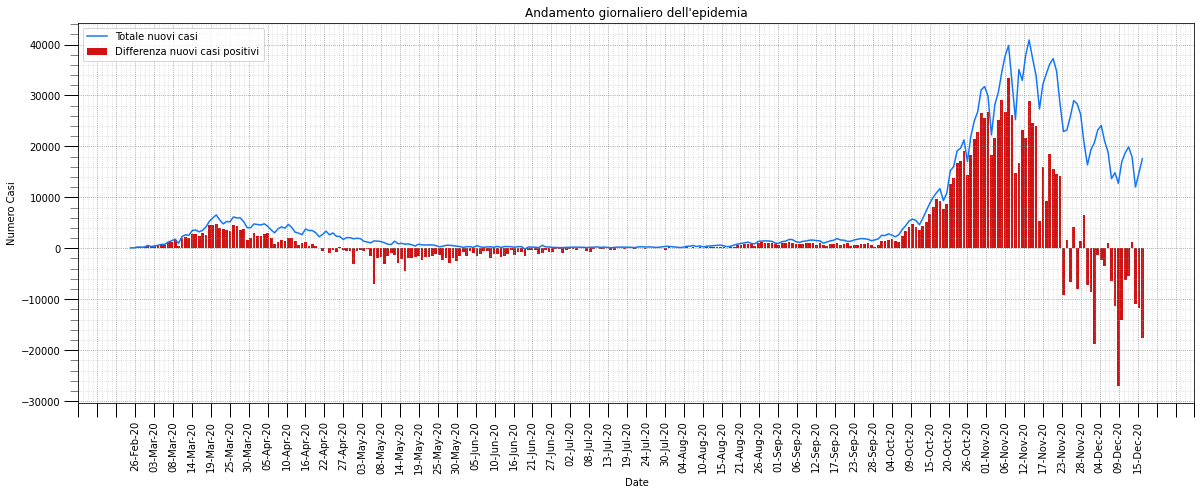

In [104]:
date = incremental_data['data'].to_numpy()
total_cases = incremental_data['totale_casi'].to_numpy()
new_positives = incremental_data['nuovi_attualmente_positivi'].to_numpy()

fig, ax = plt.subplots()

colors = COL_TOTALE_CASI
legends = "Totale nuovi casi"
ax.plot(date, total_cases,color=colors, label=legends)

colors = COL_DIFF_POSITIVI
legends = "Differenza nuovi casi positivi"
ax.bar(date, new_positives, color=colors,  label=legends)

ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero dell'epidemia")

#ax.set_ylim(-7000,42000)

beautify_graph(ax)


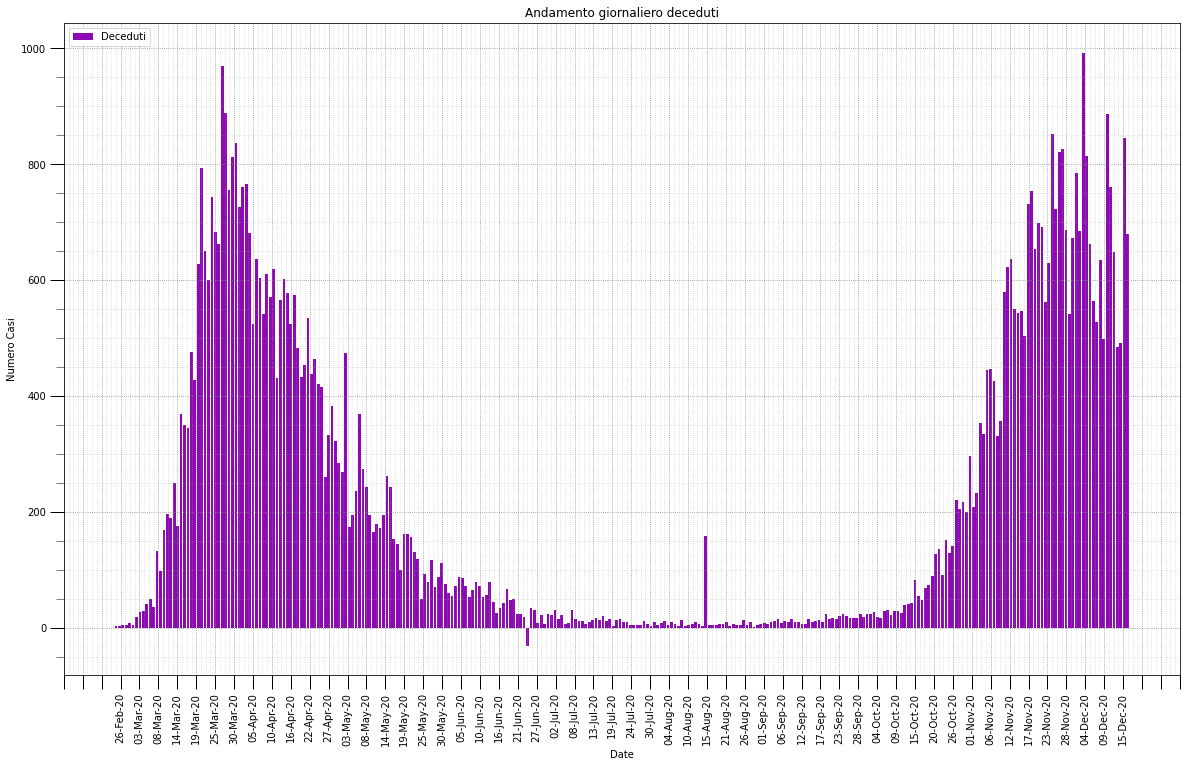

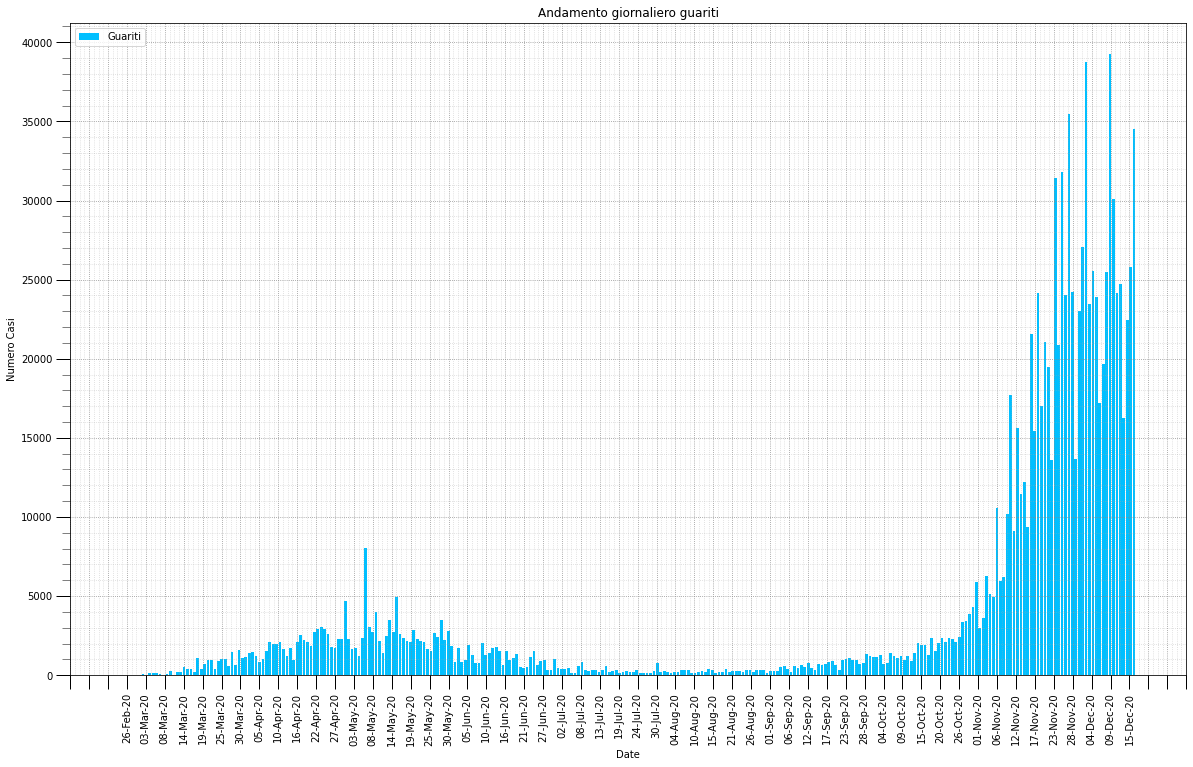

In [105]:
date = incremental_data['data'].to_numpy()
died = incremental_data['deceduti'].to_numpy()
recovered = incremental_data['dimessi_guariti'].to_numpy()

fig, ax = plt.subplots()
colors = COL_DECEDUTI
legends = "Deceduti"
ax.bar(date, died,color=colors, label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero deceduti")
beautify_graph(ax)

fig, ax = plt.subplots()
colors = COL_GUARITI
legends = "Guariti"
ax.bar(date, recovered, color=colors,  label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero guariti")
beautify_graph(ax)


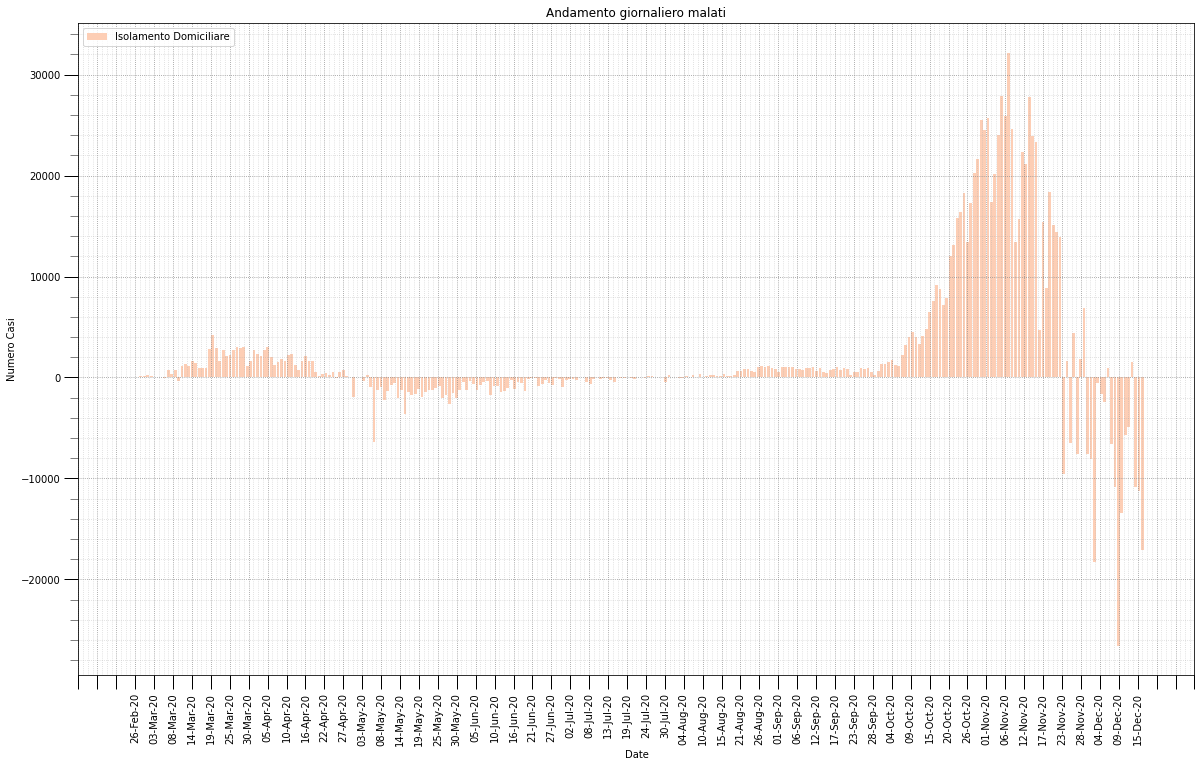

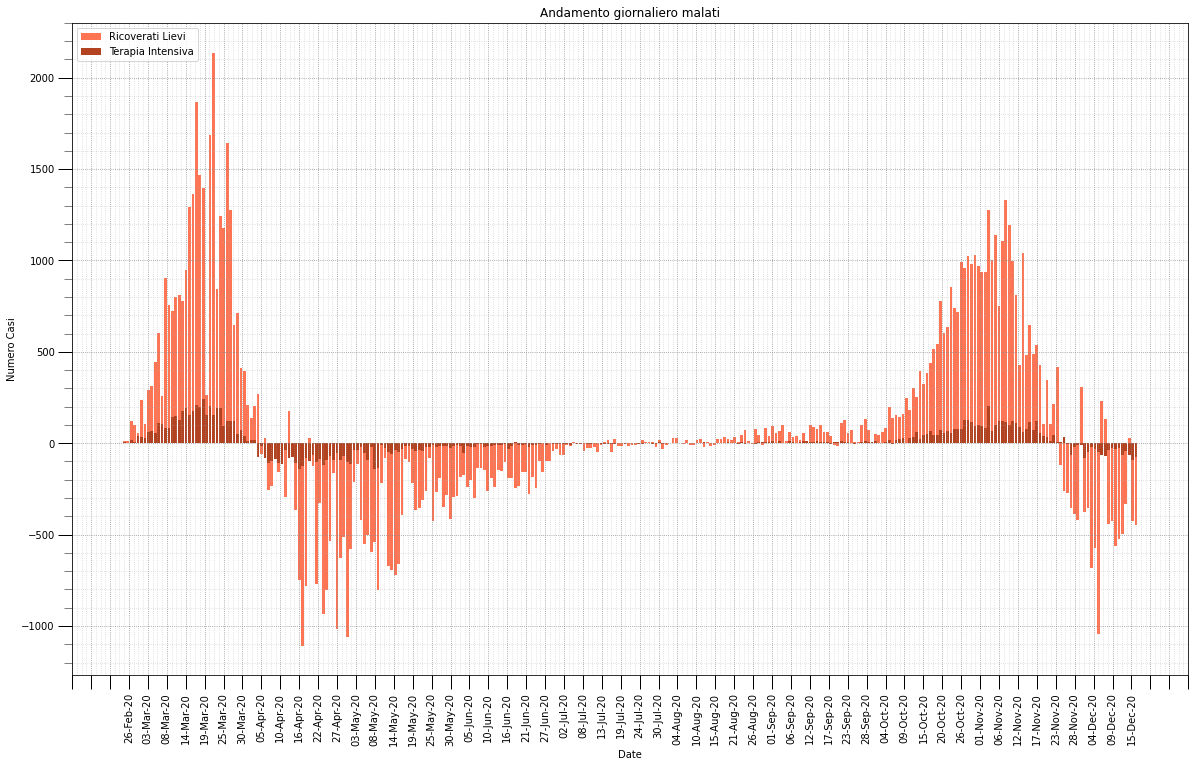

In [106]:
hospidalized =incremental_data['ricoverati_con_sintomi'].to_numpy()
intensive =incremental_data['terapia_intensiva'].to_numpy()
home =incremental_data['isolamento_domiciliare'].to_numpy()


fig, ax = plt.subplots()

colors = COL_ISOLAMENTO_DOMICILIARE
legends = "Isolamento Domiciliare"
ax.bar(date, home, color=colors,  label=legends)

ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero malati")

beautify_graph(ax)

fig, ax = plt.subplots()


colors = COL_RICOVERATI
legends = "Ricoverati Lievi"
ax.bar(date, hospidalized, color=colors,  label=legends)

colors = COL_TERAPIA_INTENSIVA
legends = "Terapia Intensiva"
ax.bar(date, intensive, color=colors,  label=legends)


ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero malati")
beautify_graph(ax)


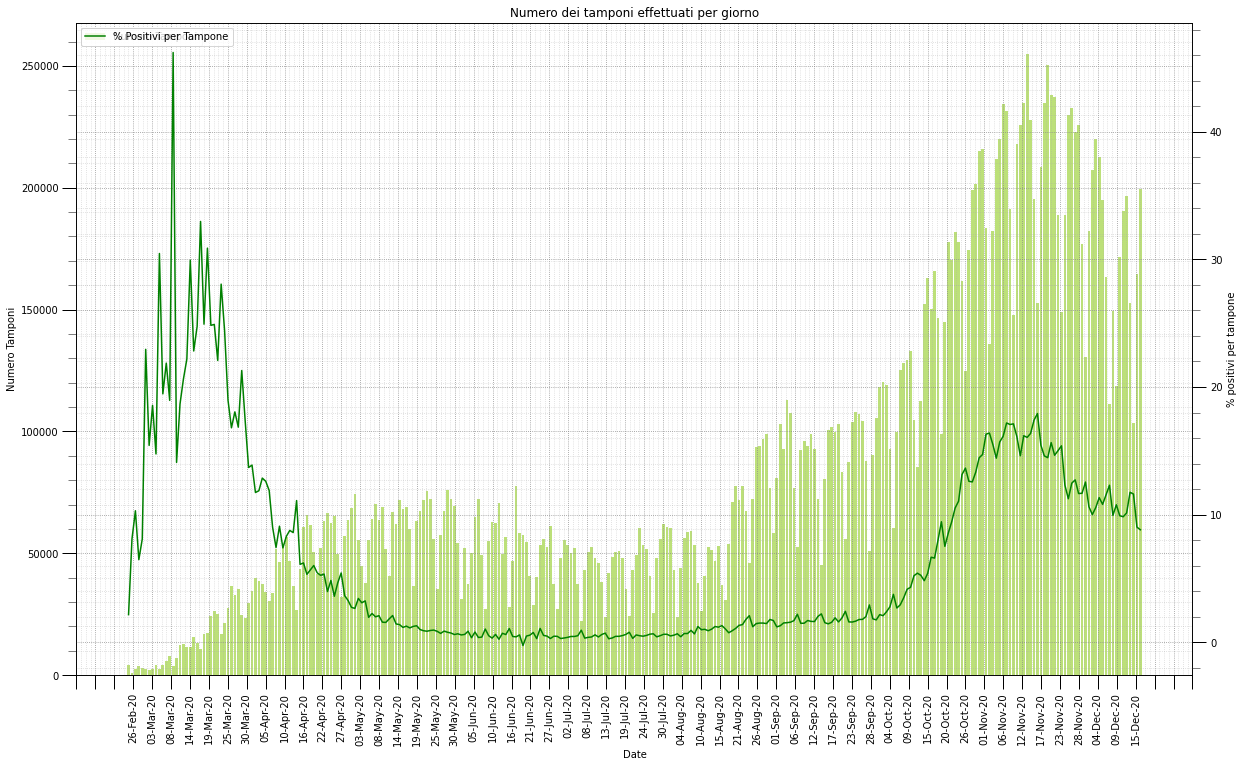

In [107]:
swabs =incremental_data['tamponi'].to_numpy()
swabs_percent =incremental_data['CASI PER TAMPONE (%)'].to_numpy()

fig, ax = plt.subplots()

colors = COL_TAMPONI
legends = "Numero Tamponi"
ax.bar(date, swabs, color=colors,  label=legends)
ax.set_title("Numero dei tamponi effettuati per giorno")
ax.set_ylabel('Numero Tamponi')
plt.xticks(rotation=90)
ax2 = ax.twinx() 
colors = COL_AVG
legends = "% Positivi per Tampone"
ax2.plot(date, swabs_percent, color=colors,  label=legends)

ax2.set_ylabel('% positivi per tampone')
ax2.axes.get_xaxis().set_visible(False)


beautify_graph(ax)
beautify_graph(ax2)


#### I dati incrementali degli ultimi 10 giorni

In [108]:

show_table(incremental_data.rename(columns=NAME_LABELS),15).drop('TOT. POSITIVI', axis=1)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
02-Dec-20        20709          -18715    38740       684         -404   
03-Dec-20        23219           -1248    23474       993         -701   
04-Dec-20        24110           -2280    25576       814         -602   
05-Dec-20        21052           -3533    23923       662        -1092   
06-Dec-20        18887            1137    17186       564          170   
07-Dec-20        13679           -6487    19638       528           61   
08-Dec-20        14837          -11294    25497       634         -480   
09-Dec-20        12755          -27010    39266       499         -453   
10-Dec-20        16998          -13988    30099       887         -594   
11-Dec-20        18726           -6204    24169       761         -552   
12-Dec-20        19902           -5475    24728       649         -562   
13-Dec-20        17937            1183    16270       484         -372   
14-Dec-20        12025          -10922    22456       491          -33   
15-Dec-20        14839          -11796    25789       846         -515   
16-Dec-20        17568          -17607    34495       680         -522   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  \
                                                              
02-Dec-20        -357           -47         -18311   207143   
03-Dec-20        -682           -19           -547   220047   
04-Dec-20        -572           -30          -1678   212741   
05-Dec-20       -1042           -50          -2441   194984   
06-Dec-20         233           -63            967   163550   
07-Dec-20         133           -72          -6548   111217   
08-Dec-20        -443           -37         -10814   149232   
09-Dec-20        -428           -25         -26557   118475   
10-Dec-20        -565           -29         -13394   171586   
11-Dec-20        -526           -26          -5652   190416   
12-Dec-20        -496           -66          -4913   196439   
13-Dec-20        -331           -41           1555   152697   
14-Dec-20          30           -63         -10889   103584   
15-Dec-20        -423           -92         -11281   164431   
16-Dec-20        -445           -77         -17085   199489   

           CASI PER TAMPONE (%)  
                                 
02-Dec-20                 10.00  
03-Dec-20                 10.55  
04-Dec-20                 11.33  
05-Dec-20                 10.80  
06-Dec-20                 11.55  
07-Dec-20                 12.30  
08-Dec-20                  9.94  
09-Dec-20                 10.77  
10-Dec-20                  9.91  
11-Dec-20                  9.83  
12-Dec-20                 10.13  
13-Dec-20                 11.75  
14-Dec-20                 11.61  
15-Dec-20                  9.02  
16-Dec-20                  8.81

#### I dati cumulati degli ultimi 10 giorni

In [109]:
show_table(national_trend.rename(columns = NAME_LABELS),15).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
02-Dec-20      1641610         761230   823335     57045        36070   
03-Dec-20      1664829         759982   846809     58038        35369   
04-Dec-20      1688939         757702   872385     58852        34767   
05-Dec-20      1709991         754169   896308     59514        33675   
06-Dec-20      1728878         755306   913494     60078        33845   
07-Dec-20      1742557         748819   933132     60606        33906   
08-Dec-20      1757394         737525   958629     61240        33426   
09-Dec-20      1770149         710515   997895     61739        32973   
10-Dec-20      1787147         696527  1027994     62626        32379   
11-Dec-20      1805873         690323  1052163     63387        31827   
12-Dec-20      1825775         684848  1076891     64036        31265   
13-Dec-20      1843712         686031  1093161     64520        30893   
14-Dec-20      1855737         675109  1115617     65011        30860   
15-Dec-20      1870576         663313  1141406     65857        30345   
16-Dec-20      1888144         645706  1175901     66537        29823   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.   TAMPONI  
                                                              
02-Dec-20       32454          3616         725160  22334342  
03-Dec-20       31772          3597         724613  22554389  
04-Dec-20       31200          3567         722935  22767130  
05-Dec-20       30158          3517         720494  22962114  
06-Dec-20       30391          3454         721461  23125664  
07-Dec-20       30524          3382         714913  23236881  
08-Dec-20       30081          3345         704099  23386113  
09-Dec-20       29653          3320         677542  23504588  
10-Dec-20       29088          3291         664148  23676174  
11-Dec-20       28562          3265         658496  23866590  
12-Dec-20       28066          3199         653583  24063029  
13-Dec-20       27735          3158         655138  24215726  
14-Dec-20       27765          3095         644249  24319310  
15-Dec-20       27342          3003         632968  24483741  
16-Dec-20       26897          2926         615883  24683230

### Andamento Nazionale
I dati cumulati nei giorni. Ci da idea di come sta evolvendo l'epidemia.

Text(0.5, 1.0, 'Andamento cumulato pandemia (scala logaritmica)')

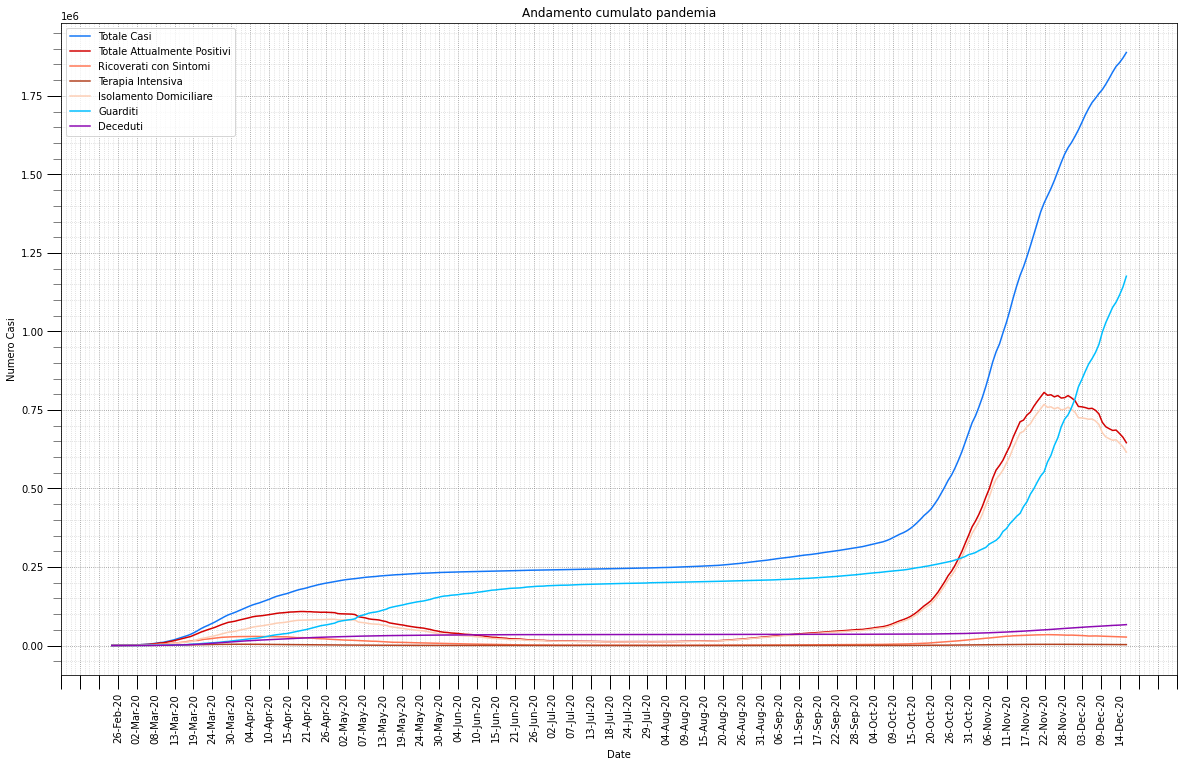

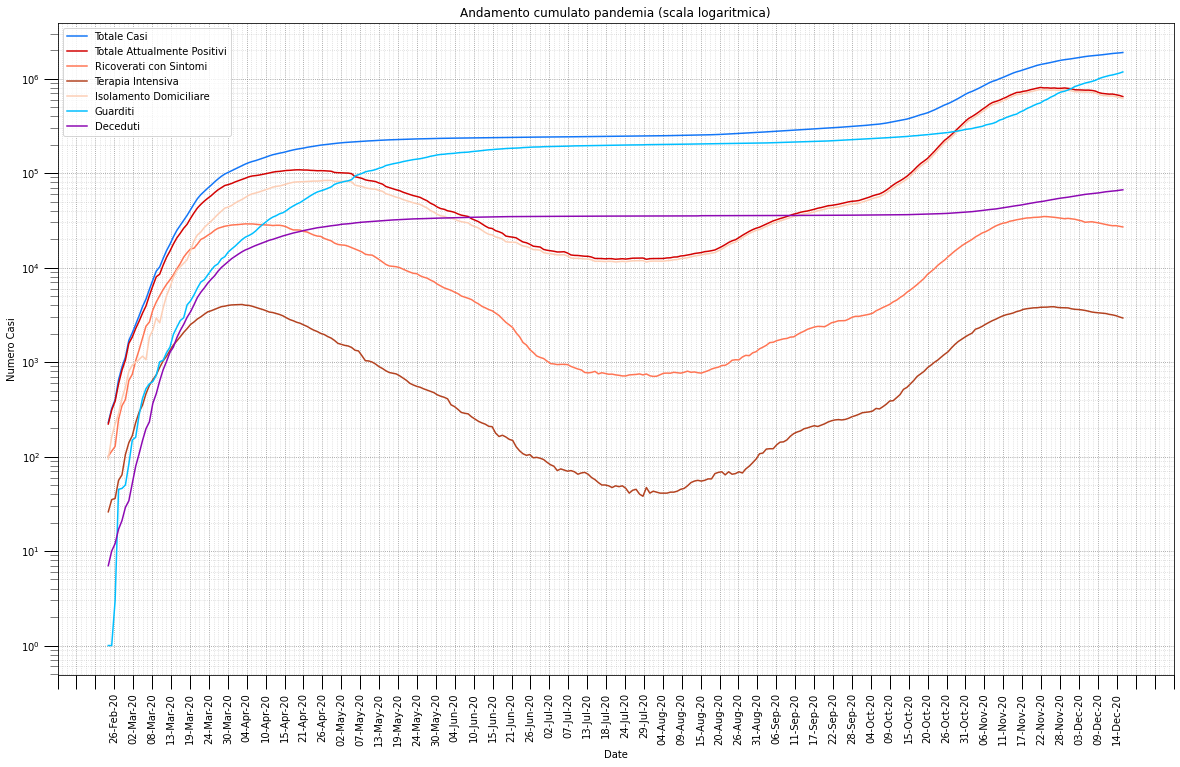

In [110]:
date = national_trend['data'].to_numpy()
totale_casi =national_trend['totale_casi'].to_numpy()
totale_attualmente_positivi =national_trend['totale_attualmente_positivi'].to_numpy()
ricoverati_con_sintomi =national_trend['ricoverati_con_sintomi'].to_numpy()
terapia_intensiva =national_trend['terapia_intensiva'].to_numpy()
isolamento_domiciliare =national_trend['isolamento_domiciliare'].to_numpy()
dimessi_guariti =national_trend['dimessi_guariti'].to_numpy()
deceduti =national_trend['deceduti'].to_numpy()

def plot_national_data():
    colors = COL_TOTALE_CASI
    legends = "Totale Casi"
    ax.plot(date, totale_casi, color=colors,  label=legends)

    colors = COL_ATTUALMENTE_POSITIVI
    legends = "Totale Attualmente Positivi"
    ax.plot(date, totale_attualmente_positivi, color=colors,  label=legends)

    colors = COL_RICOVERATI
    legends = "Ricoverati con Sintomi"
    ax.plot(date, ricoverati_con_sintomi, color=colors,  label=legends)

    colors = COL_TERAPIA_INTENSIVA
    legends = "Terapia Intensiva"
    ax.plot(date, terapia_intensiva, color=colors,  label=legends)

    colors = COL_ISOLAMENTO_DOMICILIARE
    legends = "Isolamento Domiciliare"
    ax.plot(date, isolamento_domiciliare, color=colors,  label=legends)

    colors = COL_GUARITI
    legends = "Guarditi"
    ax.plot(date, dimessi_guariti, color=colors,  label=legends)

    colors = COL_DECEDUTI
    legends = "Deceduti"
    ax.plot(date, deceduti, color=colors,  label=legends)
    beautify_graph(ax)


plt.rcParams['figure.figsize'] = [20, 12]
fig, ax = plt.subplots()

plot_national_data()
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento cumulato pandemia")

fig, ax = plt.subplots()
plt.yscale('log')

plot_national_data()
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento cumulato pandemia (scala logaritmica)")

### Percentuale di crescita
Le percentuali di crescita sono valori che danno idea rispetto al giorno precedente di come si muove l'epidemia.
Questi valori a causa del numero molto elevato di contagi è normale che scendano.

In [111]:
plt.rcParams['figure.figsize'] = [20, 7]
growth_rates = pd.DataFrame()
growth_rates['data'] = national_trend['data']
growth_rates_columns = ['totale_casi','nuovi_attualmente_positivi', 'totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', 'totale_ospedalizzati', 'ricoverati_con_sintomi', 'terapia_intensiva', 'isolamento_domiciliare',  'tamponi']

for c in growth_rates_columns:
    growth_rates[c] = (national_trend[c] - national_trend[c].shift(1))/abs(national_trend[c].shift(1))*100
growth_rates= growth_rates.round(2)
growth_rates=growth_rates[1:]

In [112]:
show_table(growth_rates.rename(columns=NAME_LABELS),7)

CASI TOTALI  DIFF. POSITIVI  TOT. POSITIVI  GUARITI  DECEDUTI  \
                                                                           
10-Dec-20         0.96           48.21          -1.97     3.02      1.44   
11-Dec-20         1.05           55.65          -0.89     2.35      1.22   
12-Dec-20         1.10           11.75          -0.79     2.35      1.02   
13-Dec-20         0.98          121.61           0.17     1.51      0.76   
14-Dec-20         0.65        -1023.25          -1.59     2.05      0.76   
15-Dec-20         0.80           -8.00          -1.75     2.31      1.30   
16-Dec-20         0.94          -49.26          -2.65     3.02      1.03   

           TOT. RICOV.  RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                                          
10-Dec-20        -1.80       -1.91         -0.87          -1.98     0.73  
11-Dec-20        -1.70       -1.81         -0.79          -0.85     0.80  
12-Dec-20        -1.77       -1.74         -2.02          -0.75     0.82  
13-Dec-20        -1.19       -1.18         -1.28           0.24     0.63  
14-Dec-20        -0.11        0.11         -1.99          -1.66     0.43  
15-Dec-20        -1.67       -1.52         -2.97          -1.75     0.68  
16-Dec-20        -1.72       -1.63         -2.56          -2.70     0.81

### Trends e medie
Uno spaccato di alcuni dati.
Viene visualizzato anche il trend medio settimanale.
GR = Growth Rate - Fattore di crescita

In [113]:
avg_trend = pd.DataFrame()
avg_trend['data'] = national_trend['data']

avg_trend['totale_casi'] = national_trend['totale_casi']
avg_trend['totale_casi_percent'] = growth_rates['totale_casi']
avg_trend['avg_totale'] = growth_rates['totale_casi'].rolling(7).mean().round(2)

avg_trend['attualmente_positivi'] = national_trend['totale_attualmente_positivi']
avg_trend['attualmente_positivi_percent'] = (avg_trend['attualmente_positivi'] - avg_trend['attualmente_positivi'].shift(1))/abs(avg_trend['attualmente_positivi']).shift(1)*100
avg_trend['attualmente_positivi_percent']= avg_trend['attualmente_positivi_percent'].round(2)
avg_trend['avg_att_positivi'] = avg_trend['attualmente_positivi_percent'].rolling(7).mean().round(2)

avg_trend['dimessi_guariti'] = national_trend['dimessi_guariti']
avg_trend['dimessi_guariti_percent'] = growth_rates['dimessi_guariti']
avg_trend['avg_dimessi_guariti'] = growth_rates['dimessi_guariti'].rolling(7).mean().round(2)

avg_trend['deceduti'] = incremental_data['deceduti']
avg_trend['deceduti_percent'] = growth_rates['deceduti']
avg_trend['avg_deceduti'] = growth_rates['deceduti'].rolling(7).mean().round(2)

avg_trend['tamponi'] = incremental_data['tamponi']
avg_trend['tamponi_percent'] = growth_rates['tamponi']
avg_trend['avg_tamponi'] = growth_rates['tamponi'].rolling(7).mean().round(2)

* **CASI TOTALI GR**: Quando questo numero sarà zero, l'epidemia si sarà fermata e dovremmo aspettare che tutti siano guariti (Sperando che nessuno infetti altri).
* **NUOVI CASI TOTALI GR**: Quando questo numero sarà zero, non ci saranno più nuovi contagi e dovremo solo aspettare che tutti guardiscano
* **GUARITI GR**: Quanto indica quanti guariti rispetto al giorno prima ci sono. Più è alto, più guarisce velocemente. 
* **DECEDUTI**: Questo numero indica di quanto aumentano i morti rispetto al giorno prima. 

In [114]:
LABELS = {
    'nuovi_attualmente_positivi_casi': 'NUOVI CASI', 'nuovi_attualmente_positivi_percent': 'GR(%)', 'avg_nuovi': 'MEDIA 7GG (%)',
    'attualmente_positivi': 'TOT. ATTUALMENT. POS.',
    'attualmente_positivi_percent': 'GR(%)', 'avg_att_positivi': 'MEDIA 7GG (%)',
    'tamponi_percent': 'GR(%)', 'avg_tamponi': 'MEDIA 7GG (%)',
    'deceduti_percent': 'GR(%)', 'avg_deceduti':'MEDIA 7GG (%)',
    'totale_casi_percent': 'GR(%)', 'avg_totale':'MEDIA 7GG (%)',
    'dimessi_guariti_percent':'GR(%)', 'avg_dimessi_guariti':'MEDIA 7GG (%)',
}
show_table(avg_trend,5).rename(columns=LABELS)

CASI TOTALI  GR(%)  MEDIA 7GG (%)  TOT. ATTUALMENT. POS.  GR(%)  \
                                                                             
12-Dec-20      1825775   1.10           0.94                 684848  -0.79   
13-Dec-20      1843712   0.98           0.92                 686031   0.17   
14-Dec-20      1855737   0.65           0.90                 675109  -1.59   
15-Dec-20      1870576   0.80           0.90                 663313  -1.75   
16-Dec-20      1888144   0.94           0.93                 645706  -2.65   

           MEDIA 7GG (%)  GUARITI  GR(%)  MEDIA 7GG (%)  DECEDUTI  GR(%)  \
                                                                           
12-Dec-20          -1.36  1076891   2.35           2.66       649   1.02   
13-Dec-20          -1.36  1093161   1.51           2.60       484   0.76   
14-Dec-20          -1.46  1115617   2.05           2.59       491   0.76   
15-Dec-20          -1.50  1141406   2.31           2.53       846   1.30   
16-Dec-20          -1.35  1175901   3.02           2.37       680   1.03   

           MEDIA 7GG (%)  TAMPONI  GR(%)  MEDIA 7GG (%)  
                                                         
12-Dec-20           1.05   196439   0.82           0.67  
13-Dec-20           1.03   152697   0.63           0.66  
14-Dec-20           1.01   103584   0.43           0.65  
15-Dec-20           1.04   164431   0.68           0.66  
16-Dec-20           1.08   199489   0.81           0.70

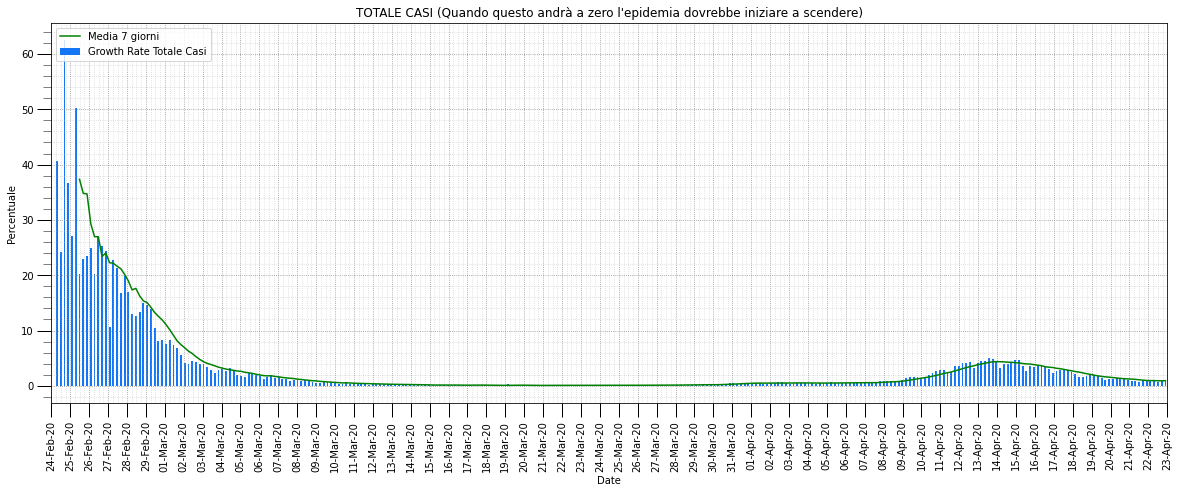

In [115]:
fig, ax = plt.subplots()
ay = avg_trend.plot(kind='line', x='data', y=['avg_totale'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind='bar', x='data', y=['totale_casi_percent'], color=[COL_TOTALE_CASI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("TOTALE CASI (Quando questo andrà a zero l'epidemia dovrebbe iniziare a scendere)")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

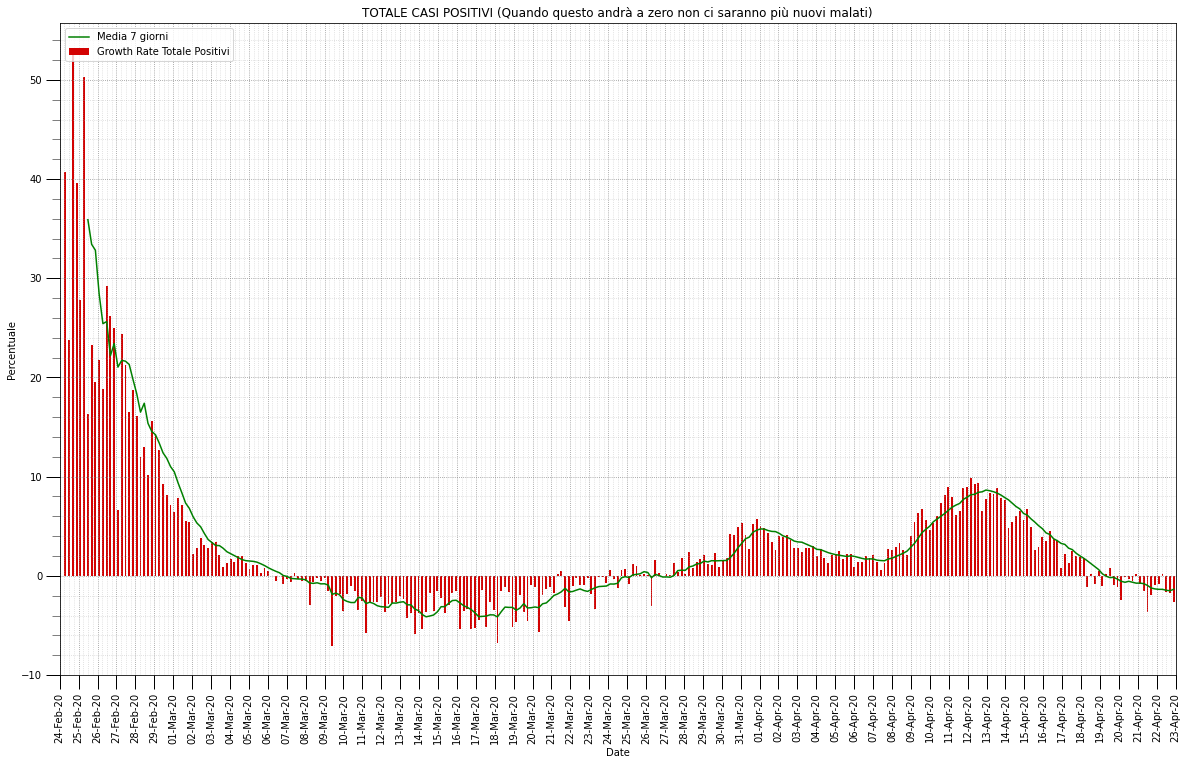

In [116]:
fig, ax = plt.subplots()

#ax.bar(x, series+fill, color=[COL_ATTUALMENTE_POSITIVI], label='Growth Rate Totale Positivi')
ay = avg_trend.plot(kind='line', x='data', y=['avg_att_positivi'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind="bar", x='data', y=['attualmente_positivi_percent'], color=[COL_ATTUALMENTE_POSITIVI], label=['Growth Rate Totale Positivi'], ax=ay)

ax.set_title("TOTALE CASI POSITIVI (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Percentuale')

beautify_graph(ax)


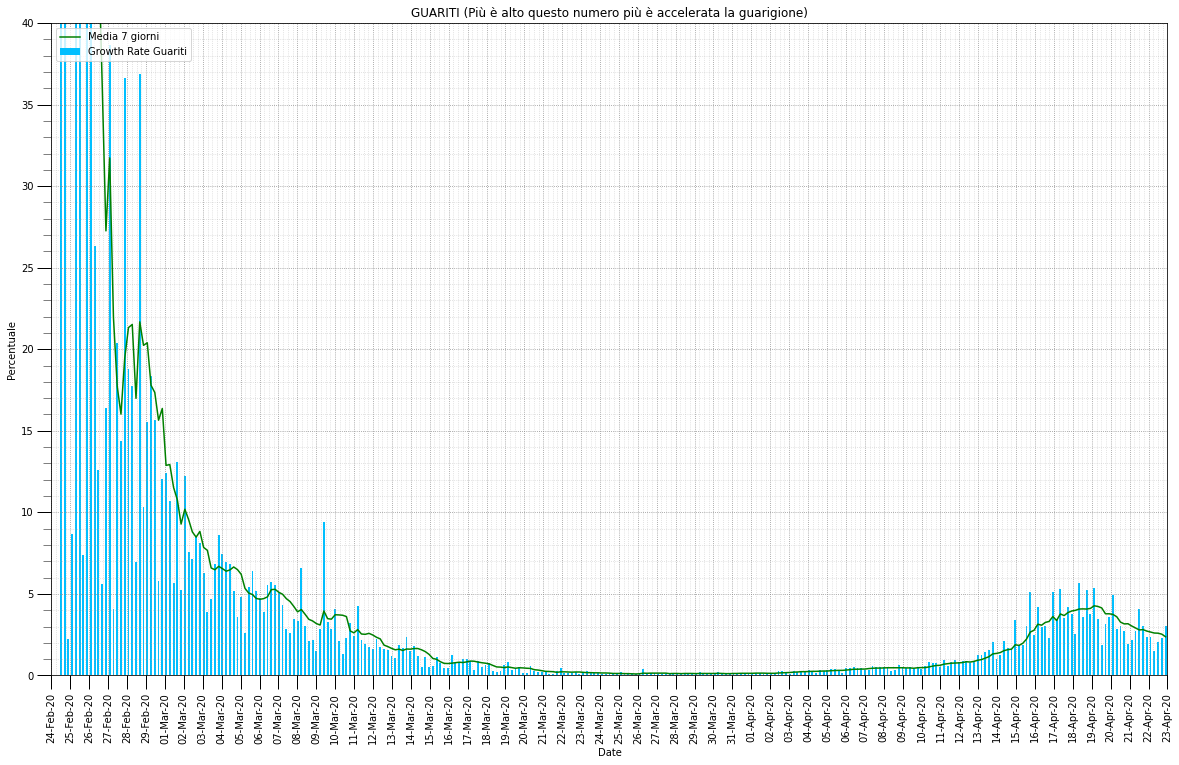

In [117]:
fig, ax = plt.subplots()
plot = ['dimessi_guariti_percent']

labels = ['Growth Rate Guariti']
ay = avg_trend.plot(kind='bar', x='data', y=plot, color=[COL_GUARITI], rot=90, label=labels, ax=ax)

plot = ['avg_dimessi_guariti']
labels = ['Media 7 giorni']
ay = avg_trend.plot(kind='line', x='data', y=plot, color=[COL_AVG], rot=90, label=labels, ax=ax)

ax.set_title("GUARITI (Più è alto questo numero più è accelerata la guarigione)")
ax.set_ylabel('Percentuale')
ax.set_ylim(0,40)
beautify_graph(ax)

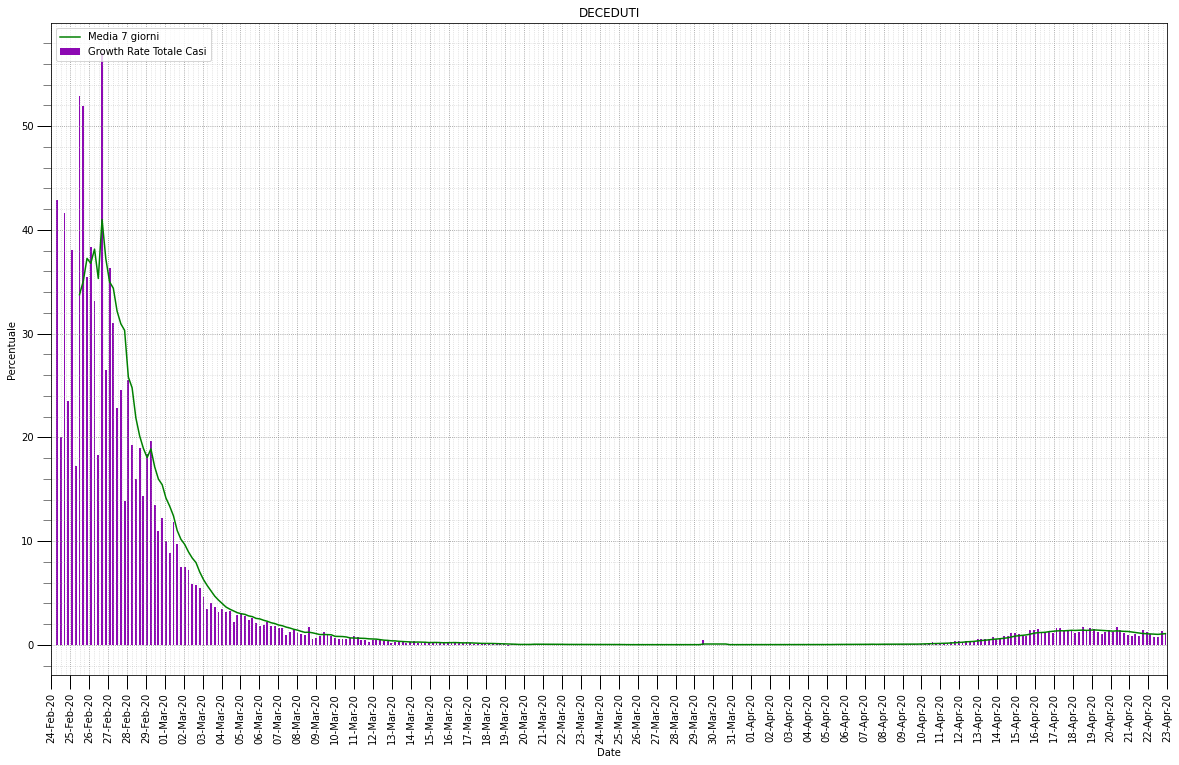

In [118]:
fig, ax = plt.subplots()

ay = avg_trend.plot(kind='line', x='data', y=['avg_deceduti'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
avg_trend.plot(kind='bar', x='data', y=['deceduti_percent'], color=[COL_DECEDUTI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("DECEDUTI")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

### Divisione percentuali dei casi
Un indicazione percentuale dei dati. La fotografia ad oggi (dall'inizio dell'epidemia italiana)

**Le percentuali giornaliere (dati giorno per giorno)**

In [119]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = incremental_data['data']
percents_in_period['ricoverati_con_sintomi'] = (incremental_data['ricoverati_con_sintomi'] / incremental_data['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (incremental_data['terapia_intensiva'] / incremental_data['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (incremental_data['isolamento_domiciliare'] / incremental_data['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (incremental_data['dimessi_guariti'] / incremental_data['totale_casi'])*100
percents_in_period['deceduti'] = (incremental_data['deceduti'] / incremental_data['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

In [120]:
percents_in_period.tail(7).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
10-Dec-20       -3.32           -0.17                  -78.80   177.07   
11-Dec-20       -2.81           -0.14                  -30.18   129.07   
12-Dec-20       -2.49           -0.33                  -24.69   124.25   
13-Dec-20       -1.85           -0.23                    8.67    90.71   
14-Dec-20        0.25           -0.52                  -90.55   186.74   
15-Dec-20       -2.85           -0.62                  -76.02   173.79   
16-Dec-20       -2.53           -0.44                  -97.25   196.35   

           DECEDUTI  
                     
10-Dec-20      5.22  
11-Dec-20      4.06  
12-Dec-20      3.26  
13-Dec-20      2.70  
14-Dec-20      4.08  
15-Dec-20      5.70  
16-Dec-20      3.87

### Percentuali totali

In [121]:
percents_in_period.tail(10)

data  ricoverati_con_sintomi  terapia_intensiva  \
                                                                  
07-Dec-20  07-Dec-20                    0.97              -0.53   
08-Dec-20  08-Dec-20                   -2.99              -0.25   
09-Dec-20  09-Dec-20                   -3.36              -0.20   
10-Dec-20  10-Dec-20                   -3.32              -0.17   
11-Dec-20  11-Dec-20                   -2.81              -0.14   
12-Dec-20  12-Dec-20                   -2.49              -0.33   
13-Dec-20  13-Dec-20                   -1.85              -0.23   
14-Dec-20  14-Dec-20                    0.25              -0.52   
15-Dec-20  15-Dec-20                   -2.85              -0.62   
16-Dec-20  16-Dec-20                   -2.53              -0.44   

           isolamento_domiciliare  dimessi_guariti  deceduti  contagi  
                                                                       
07-Dec-20                  -47.87           143.56      3.86  -670.54  
08-Dec-20                  -72.89           171.85      4.27   -74.10  
09-Dec-20                 -208.21           307.85      3.91  -139.15  
10-Dec-20                  -78.80           177.07      5.22    48.21  
11-Dec-20                  -30.18           129.07      4.06    55.65  
12-Dec-20                  -24.69           124.25      3.26    11.75  
13-Dec-20                    8.67            90.71      2.70   121.61  
14-Dec-20                  -90.55           186.74      4.08 -1023.25  
15-Dec-20                  -76.02           173.79      5.70    -8.00  
16-Dec-20                  -97.25           196.35      3.87   -49.26

**Le percentuali dall'inizio dell'epidemia**

In [122]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = national_trend['data']
percents_in_period['ricoverati_con_sintomi'] = (national_trend['ricoverati_con_sintomi'] / national_trend['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (national_trend['terapia_intensiva'] / national_trend['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (national_trend['isolamento_domiciliare'] / national_trend['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (national_trend['dimessi_guariti'] / national_trend['totale_casi'])*100
percents_in_period['deceduti'] = (national_trend['deceduti'] / national_trend['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

Lo spaccato giorno per giorno percentuale. Da qui si evidenzia come si evolve l'andamento percencentuale dell'epidemia. In basso (in verde) il grafico del Growth Rate di ogni giorno rispetto al giorno precedente. Per capire come si evolvono le percentuali in base all'aumento o la diminuzione dei nuovi casi.

In [123]:
percents_in_period.tail(7).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
10-Dec-20        1.63            0.18                   37.16    57.52   
11-Dec-20        1.58            0.18                   36.46    58.26   
12-Dec-20        1.54            0.18                   35.80    58.98   
13-Dec-20        1.50            0.17                   35.53    59.29   
14-Dec-20        1.50            0.17                   34.72    60.12   
15-Dec-20        1.46            0.16                   33.84    61.02   
16-Dec-20        1.42            0.15                   32.62    62.28   

           DECEDUTI  
                     
10-Dec-20      3.50  
11-Dec-20      3.51  
12-Dec-20      3.51  
13-Dec-20      3.50  
14-Dec-20      3.50  
15-Dec-20      3.52  
16-Dec-20      3.52

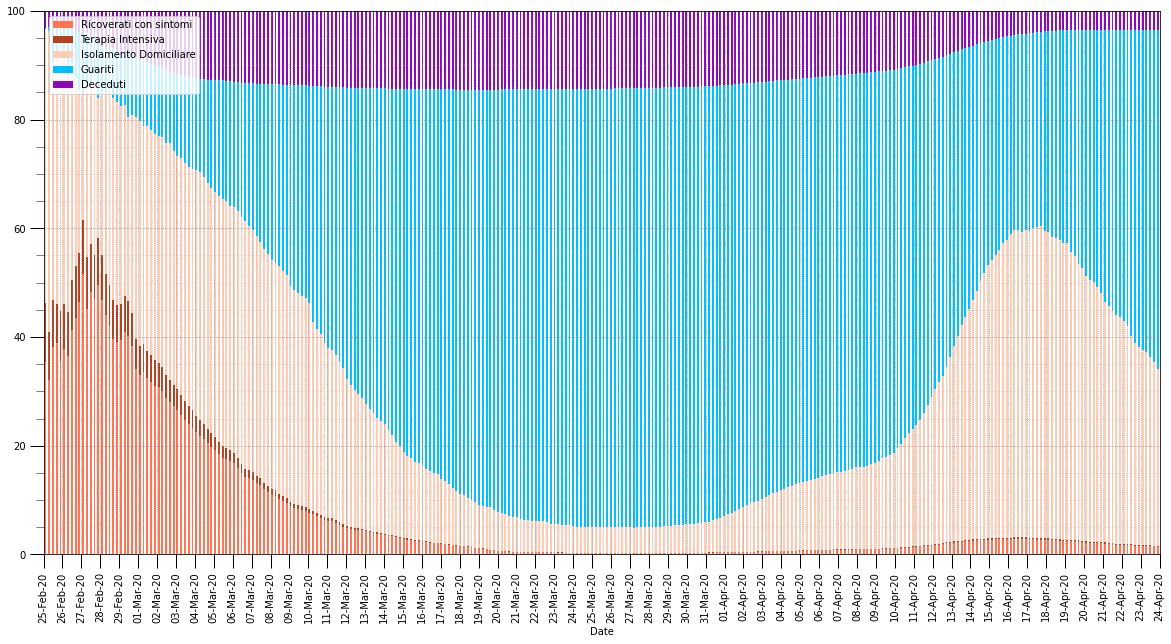

In [124]:
# %matplotlib notebook
plt.rcParams['figure.figsize'] = [20, 10]

plot = ['ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
labels = ['Ricoverati con sintomi','Terapia Intensiva','Isolamento Domiciliare','Guariti','Deceduti']
ax = percents_in_period.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=labels, stacked=True)
ax.set_ylim(0,100)

beautify_graph(ax)


## DATI REGIONALI

In [125]:
regional_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-regioni/dpc-covid19-ita-regioni.csv'))
regional_trend_read['totale_attualmente_positivi'] = regional_trend_read['totale_positivi']
regional_trend_read['nuovi_attualmente_positivi'] = regional_trend_read['variazione_totale_positivi']
regional_trend_read['DATA'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')
regional_trend_read['data'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')



In [126]:
#regional_trend.set_index(keys=['DATA'], append=False, inplace=True)
#regional_trend.index.rename('', inplace=True)


regions = regional_trend_read.denominazione_regione.unique()
regions_data = {}

for r in regions:
    data = regional_trend_read[regional_trend_read['denominazione_regione']==r]
    data.set_index(keys=['data'], append=False, inplace=True)
    regions_data[r]=data


In [127]:
#media_7_giorni =casi_tampone.rolling(7).mean().round(2)
region_colors = ['#505cf7','#e688b5','#e688b5','#791d9f','#17652e','#76f384',\
          '#bd3089','#5c4566','#3b6712','#bb90bf','#549bb5','#a674cc',\
          '#345a48','#dc9615','#51294a','#0446ca','#96bf9b','#c20cb2',\
          '#acc7fb','#ecdab7','#bbfc5f'
         ]


In [128]:
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti','nuovi_attualmente_positivi']

regional_datas = {x:pd.DataFrame() for x in plot}

for p in plot:
    for i,r in enumerate(regions):
        regional_datas[p][r]= regions_data[r][p]



### Totale Casi per Regione

In [129]:
regional_datas['totale_casi'].iloc[-1:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
16-Dec-20    32630        9648     20331    176600          148794   

           Friuli Venezia Giulia   Lazio  Liguria  Lombardia  Marche  
data                                                                  
16-Dec-20                  42099  143370    56318     450005   35680

In [130]:
regional_datas['totale_casi'].iloc[-1:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
16-Dec-20    5783         27225        19090    188387   76039     27142   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
16-Dec-20    81256   113610   26587           6943  200607

### Nuovi Casi Per Regione

In [131]:
incremental_data_regional = pd.DataFrame()
incremental_columns = ['totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

n = regional_datas['totale_casi']
for c in n.columns:
    incremental_data_regional[c] = n[c] - n[c].shift(1)
    incremental_data_regional[c] = incremental_data_regional[c].astype(pd.Int64Dtype())

incremental_data_regional = incremental_data_regional[1:]

In [132]:

incremental_data_regional.iloc[-7:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
10-Dec-20      227          46       169      1198            1452   
11-Dec-20      262         104       158      1340            1210   
12-Dec-20      277          85       235      1414            1806   
13-Dec-20      344          50       228      1219            1939   
14-Dec-20      191          66       166      1088            1570   
15-Dec-20      100          62       175       647            1233   
16-Dec-20      255          95       194       900            1236   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
10-Dec-20                    672   1488      320       2093     323  
11-Dec-20                    843   1230      340       2938     483  
12-Dec-20                    884   1194      263       2736     451  
13-Dec-20                    573   1339      331       2335     481  
14-Dec-20                    402   1315      223        945     174  
15-Dec-20                    829   1159      202       2404     228  
16-Dec-20                    779   1220      275       2994     480

In [133]:

incremental_data_regional.iloc[-7:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
10-Dec-20      22           244          217       974    1332       248   
11-Dec-20      73           252          160      1553    1813       198   
12-Dec-20      72           250          222      1443    1478       168   
13-Dec-20     119           251          157      1011    1175       633   
14-Dec-20      40            68          114       528     656       228   
15-Dec-20      37            88          377      1106    1023       231   
16-Dec-20      25           285          244      1215    1388       405   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
10-Dec-20     1059      517     182             18    4197  
11-Dec-20      999      657     219             11    3883  
12-Dec-20     1016      574     211             25    5098  
13-Dec-20      808      673     145             34    4092  
14-Dec-20      914      445      49             14    2829  
15-Dec-20     1087      332     179             20    3320  
16-Dec-20     1065      489     169             38    3817

### Totale Attualmente Positivi per Regione

In [134]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
16-Dec-20    13986        6038      8882     88204           62846   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
16-Dec-20                  13751  81267     8029      69733   11131

In [135]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
16-Dec-20    2664         10654         2802     48103   52850     15484   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
16-Dec-20    35176    15035    4323            523   94225

### Nuovi Positivi per Regione

In [136]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
10-Dec-20     -330         -13      -351     -1048           -1126   
11-Dec-20     -492         -40      -360     -1685            -662   
12-Dec-20     -355          31       -67      -391             -83   
13-Dec-20      165         -42        33      -829             790   
14-Dec-20     -427         -73       -60      -590             224   
15-Dec-20     -415          12      -200     -2428            -352   
16-Dec-20     -481        -121      -240     -2038           -1788   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
10-Dec-20                   -760  -3051     -289      -2660    -298  
11-Dec-20                     40  -2574     -193        206    -106  
12-Dec-20                    120   -875     -296      -2383    -510  
13-Dec-20                   -182   -709      -74       1283    -309  
14-Dec-20                    -85   -760     -115      -8028     508  
15-Dec-20                   -149  -1628     -165      -2431    -912  
16-Dec-20                   -188  -2954      -86      -6157    -759

In [137]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
10-Dec-20      18          -163          -70     -2376     732       -21   
11-Dec-20      63           -70           -7     -1116    1189        71   
12-Dec-20     -74           -29           -3     -2130    1245       -75   
13-Dec-20     114           -23           79     -1887     910       434   
14-Dec-20      38            13           39     -2638    -114       -63   
15-Dec-20     -38            18          153     -2366     243        23   
16-Dec-20       6            24           95     -2867     575       100   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
10-Dec-20    -1678    -2273    -277            -73    2119  
11-Dec-20     -559    -1508    -290            -67    1956  
12-Dec-20     -649    -1732    -205            -53    3039  
13-Dec-20      -42     -978     -76            -41    2567  
14-Dec-20      122     -635     -73            -34    1829  
15-Dec-20      128    -1215    -175            -61     162  
16-Dec-20     -793    -1229    -237             -4    1535

### Terapia intensiva

In [138]:
regional_datas['terapia_intensiva'].iloc[-7:,:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
10-Dec-20       65          15        24       140             229   
11-Dec-20       66          15        21       144             231   
12-Dec-20       64          14        22       137             222   
13-Dec-20       63          15        23       134             220   
14-Dec-20       64          12        21       130             222   
15-Dec-20       59          11        21       123             214   
16-Dec-20       56          11        22       124             212   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
10-Dec-20                     62    339       85        748      86  
11-Dec-20                     63    339       84        733      86  
12-Dec-20                     59    337       77        717      86  
13-Dec-20                     60    341       75        714      81  
14-Dec-20                     58    347       73        685      83  
15-Dec-20                     56    321       71        656      78  
16-Dec-20                     54    305       71        629      75

In [139]:
regional_datas['terapia_intensiva'].iloc[-7:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
10-Dec-20       7            31           48       310     200        63   
11-Dec-20       8            27           47       300     187        64   
12-Dec-20       8            27           44       304     194        61   
13-Dec-20       7            26           48       291     191        59   
14-Dec-20       8            26           53       278     184        57   
15-Dec-20       8            24           53       266     187        58   
16-Dec-20      10            22           50       257     185        57   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
10-Dec-20      197      247      55             10     330  
11-Dec-20      197      241      54              9     349  
12-Dec-20      196      228      49              8     345  
13-Dec-20      198      219      45              8     340  
14-Dec-20      189      210      41              9     345  
15-Dec-20      185      214      46              6     346  
16-Dec-20      183      202      47              7     347

## Andamento per regione

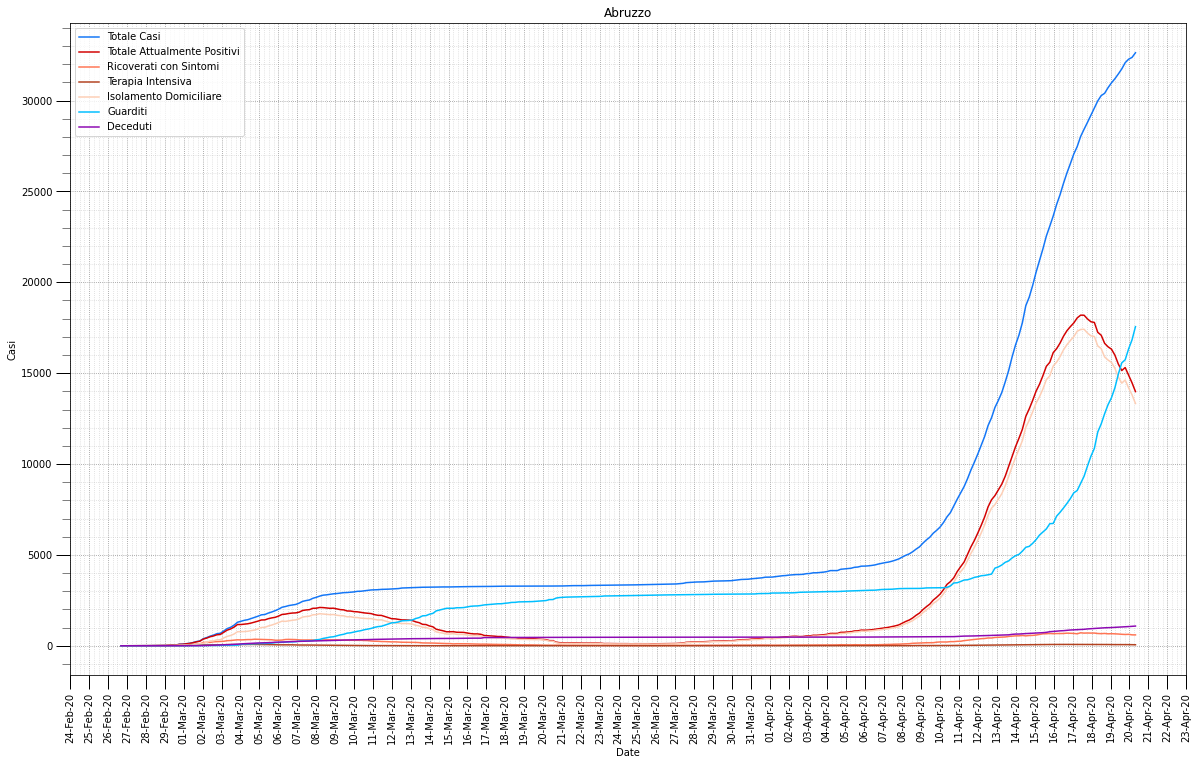

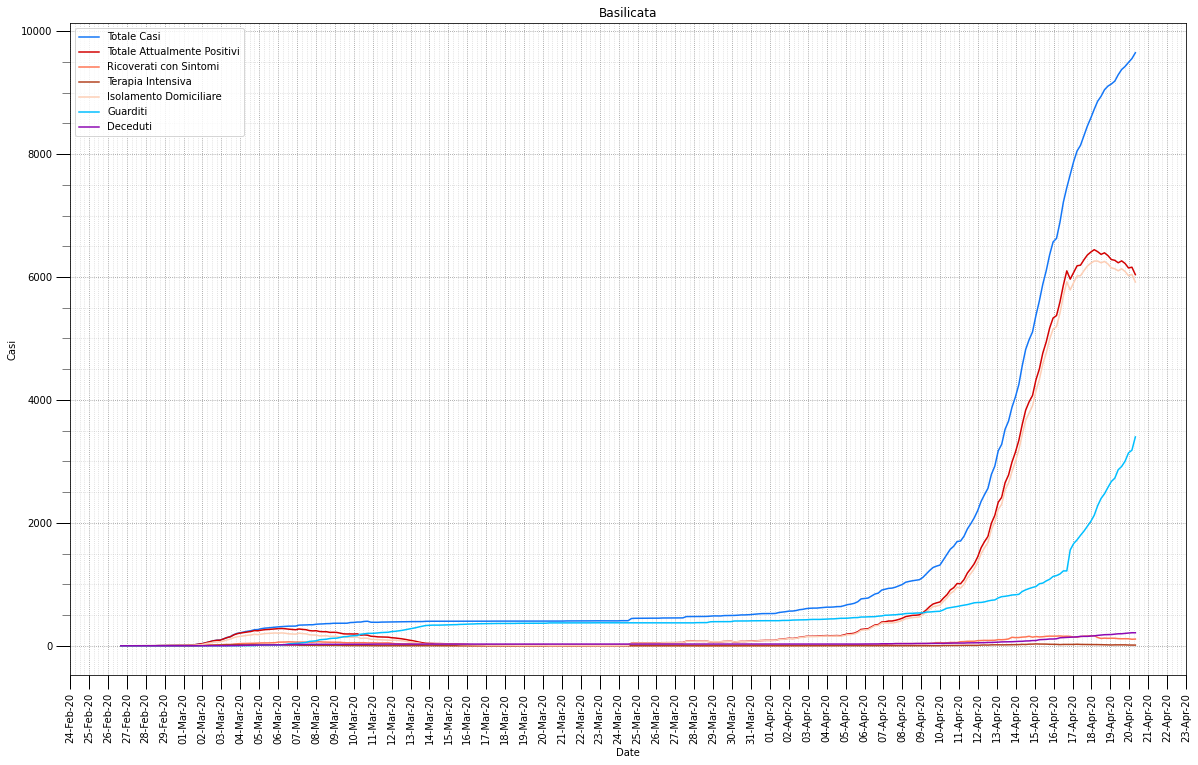

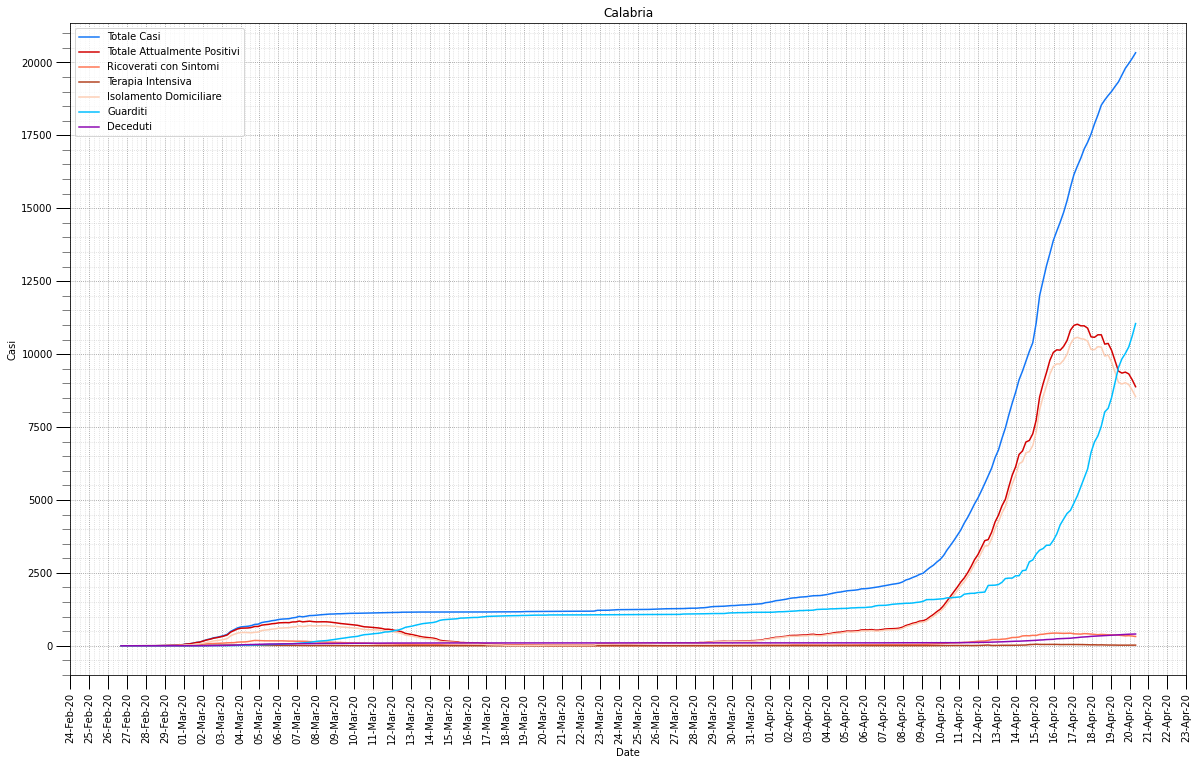

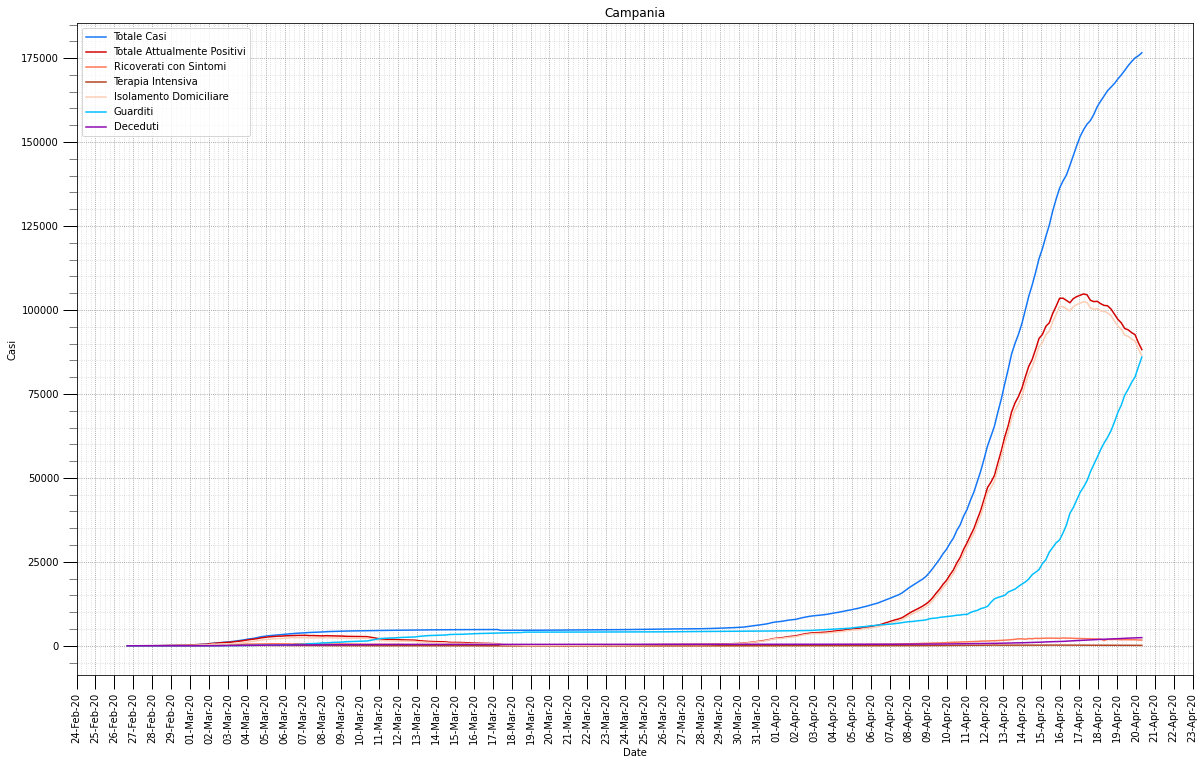

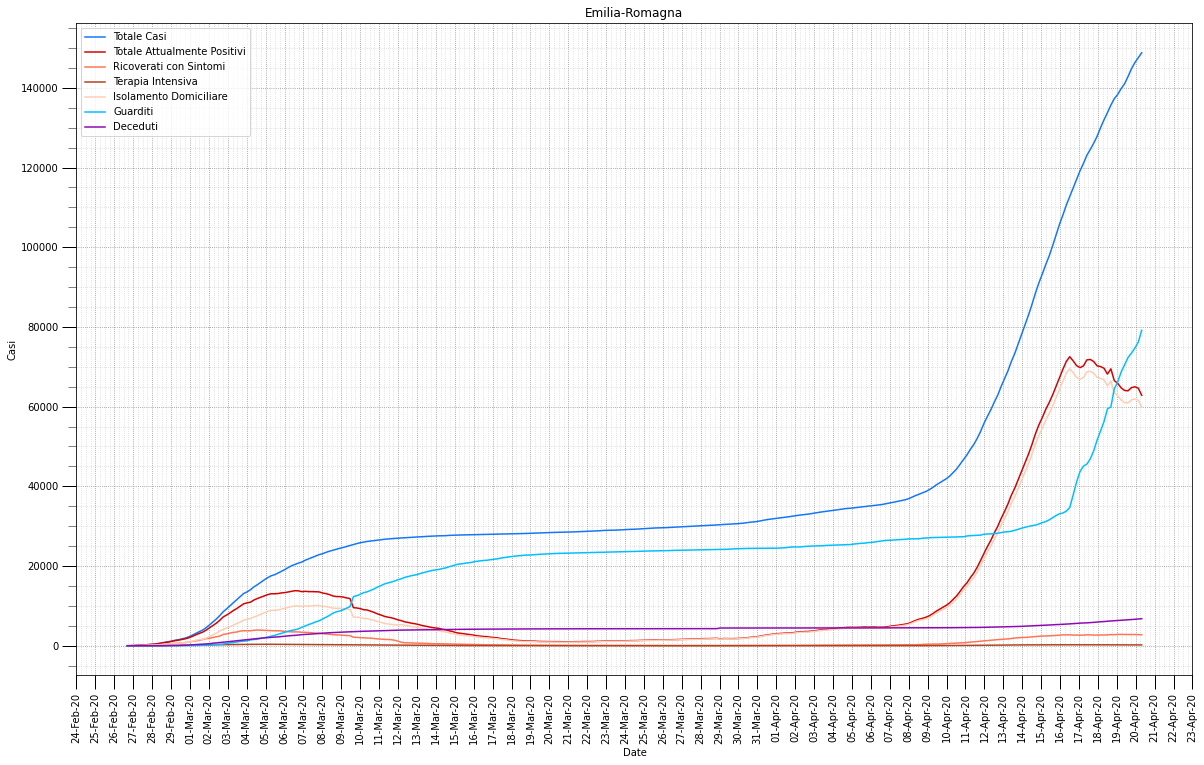

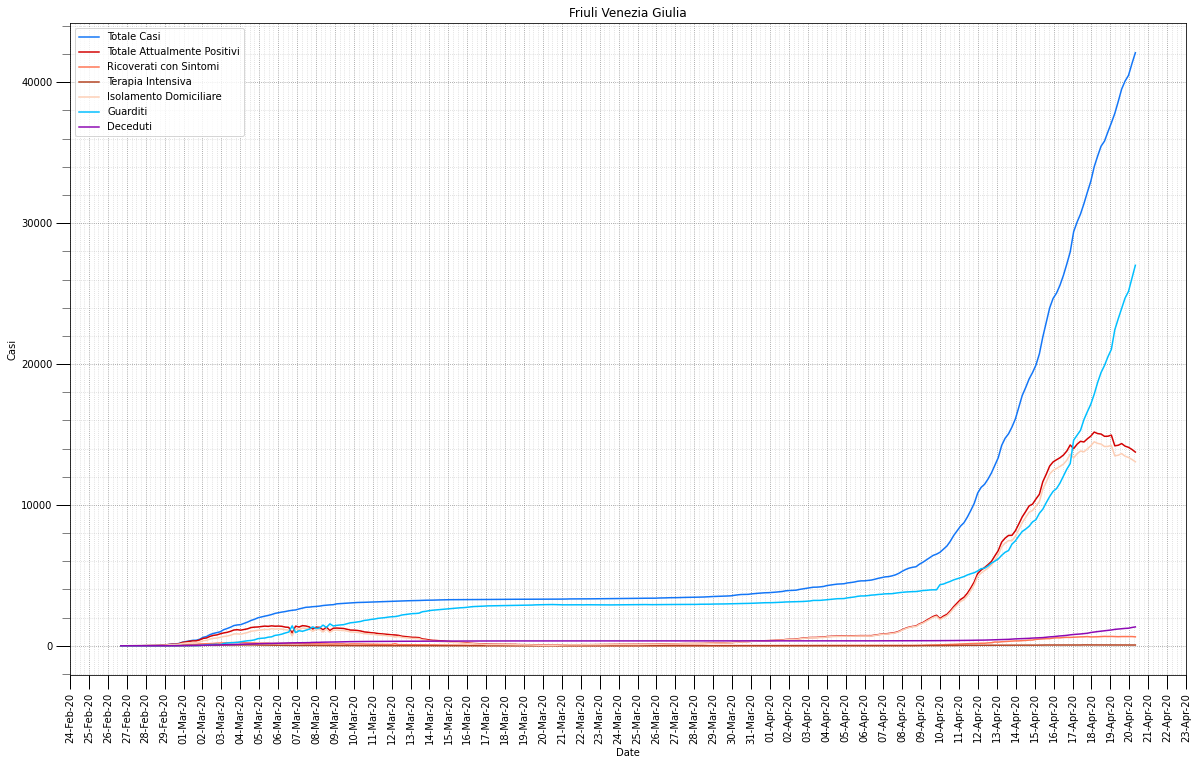

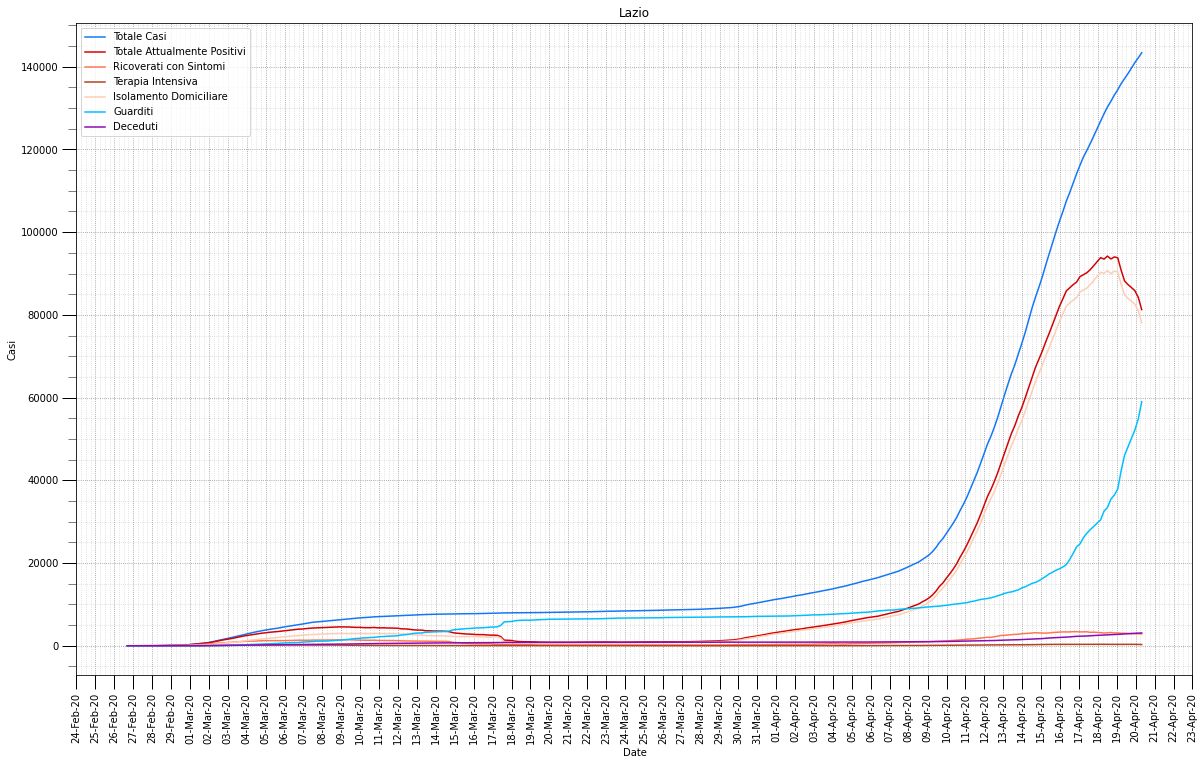

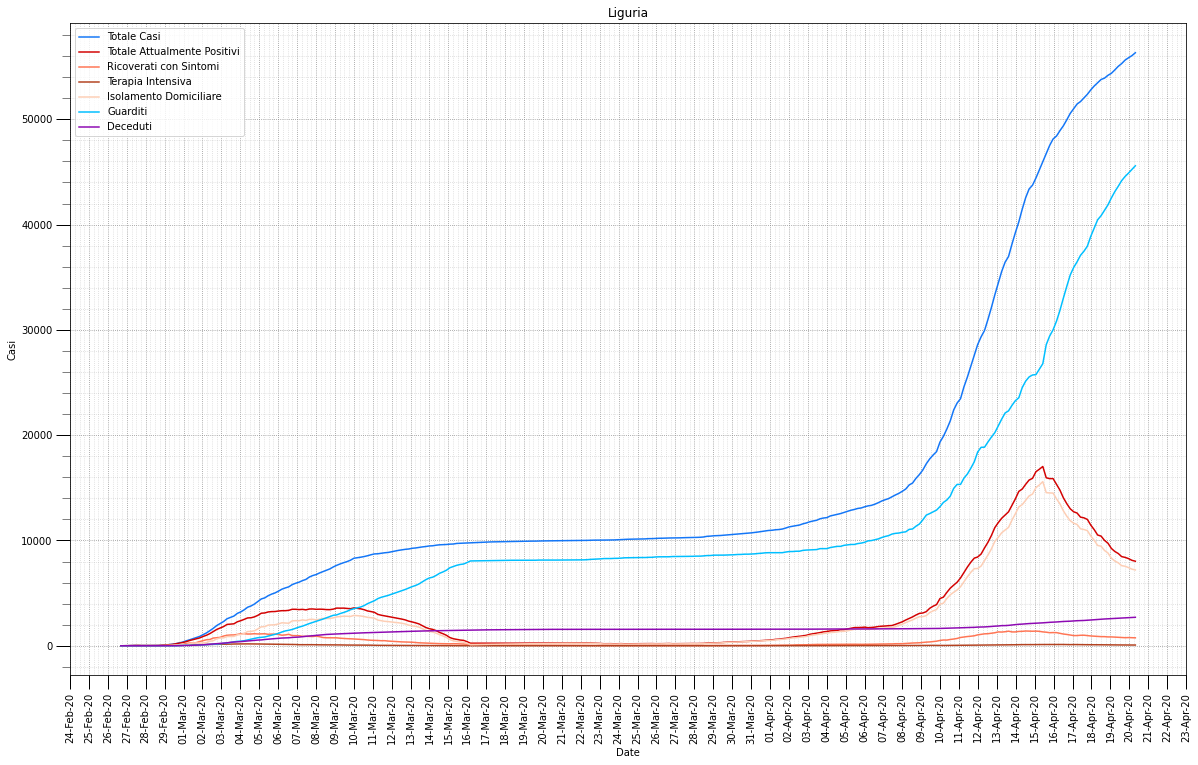

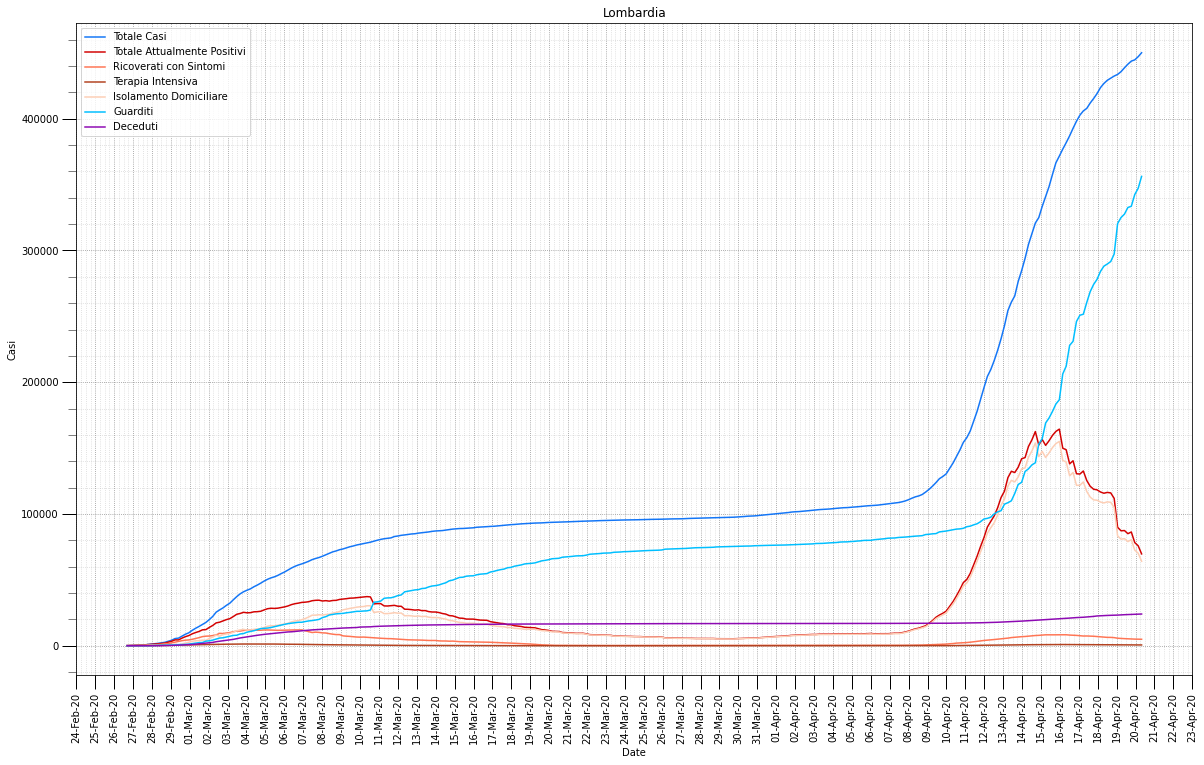

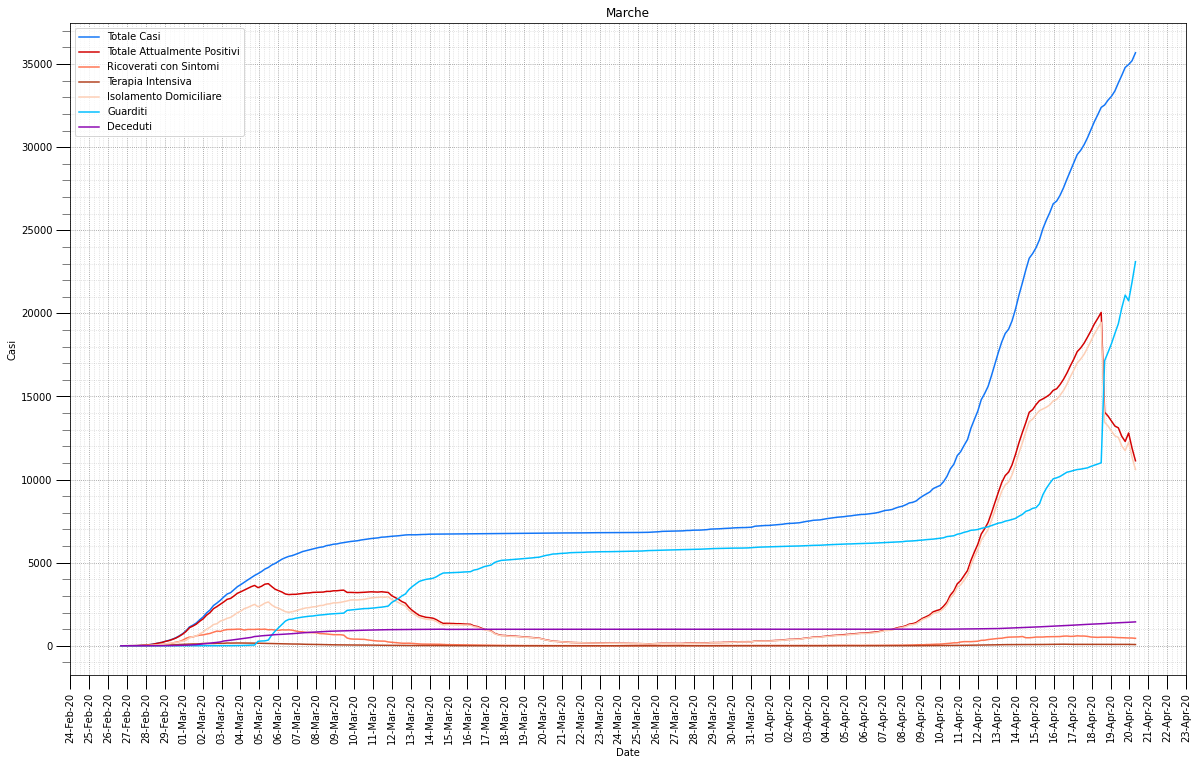

In [140]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[:10]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)

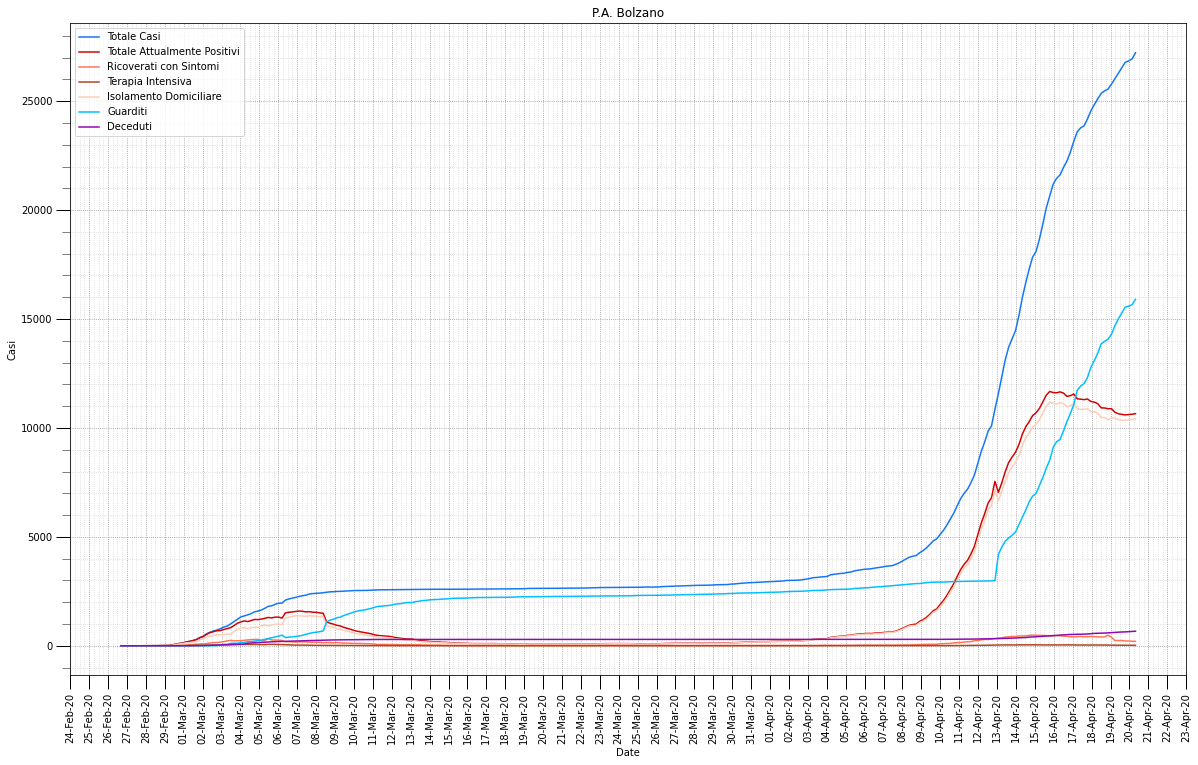

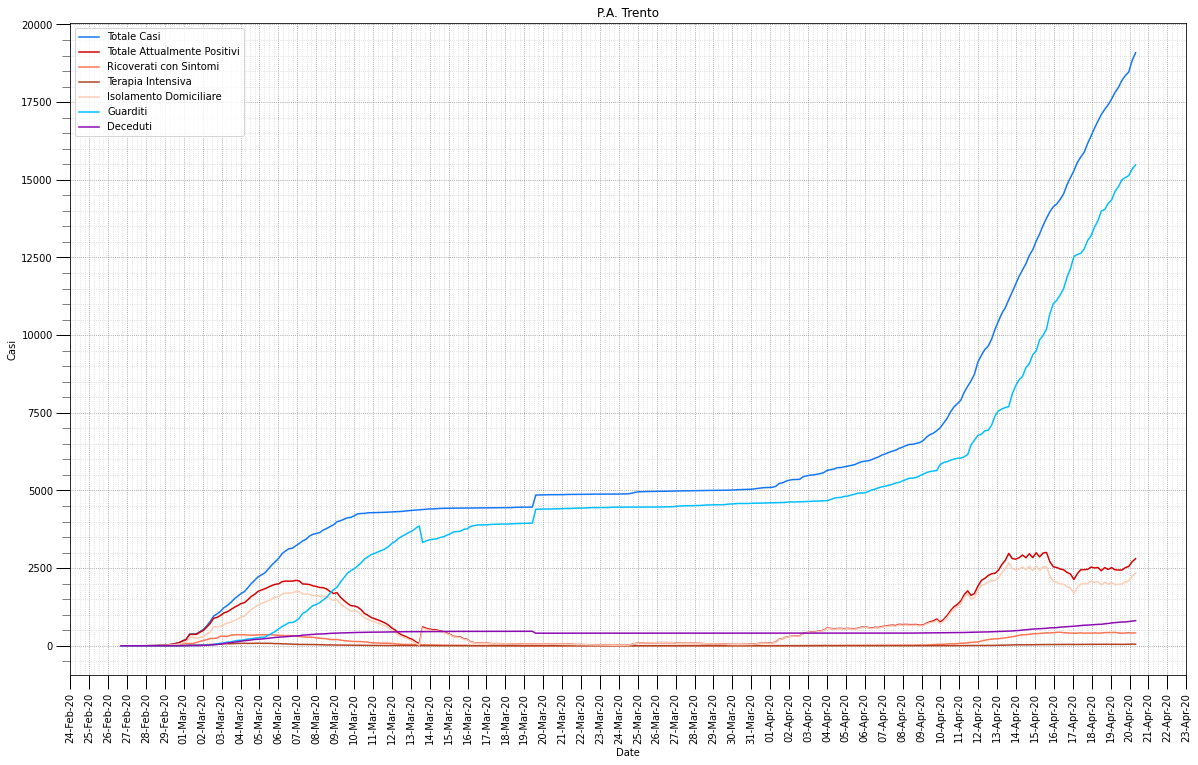

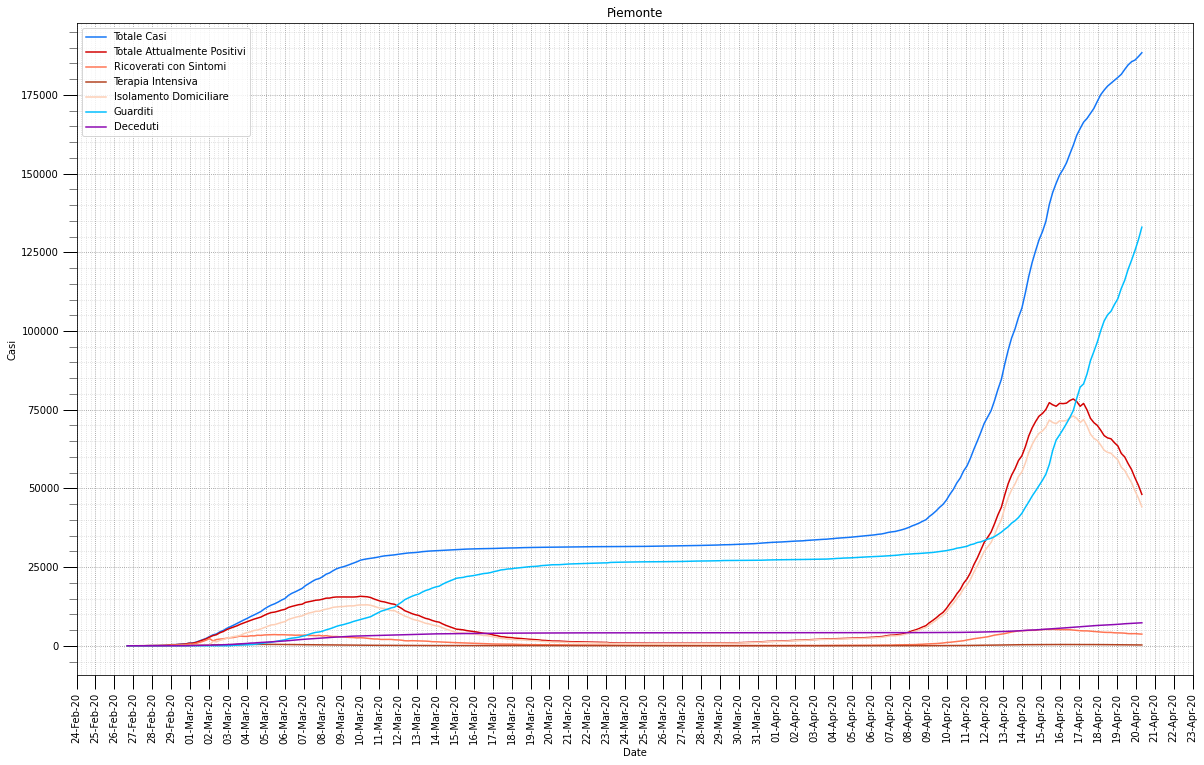

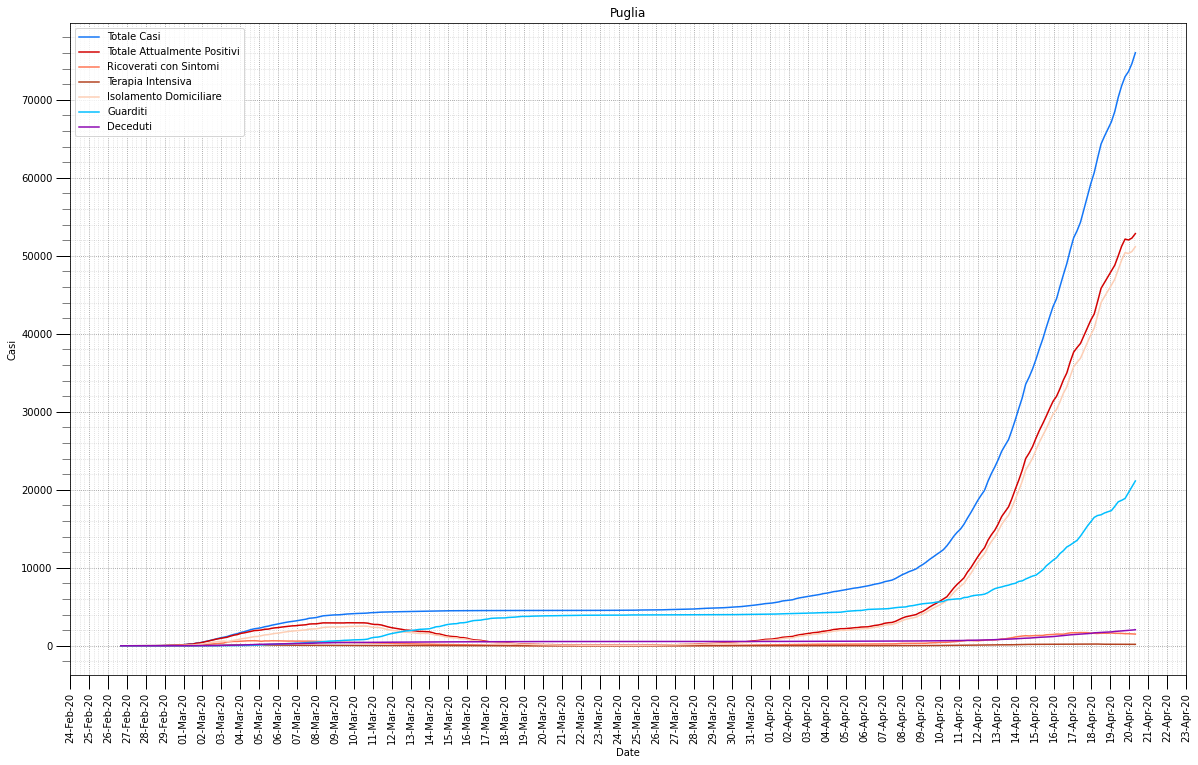

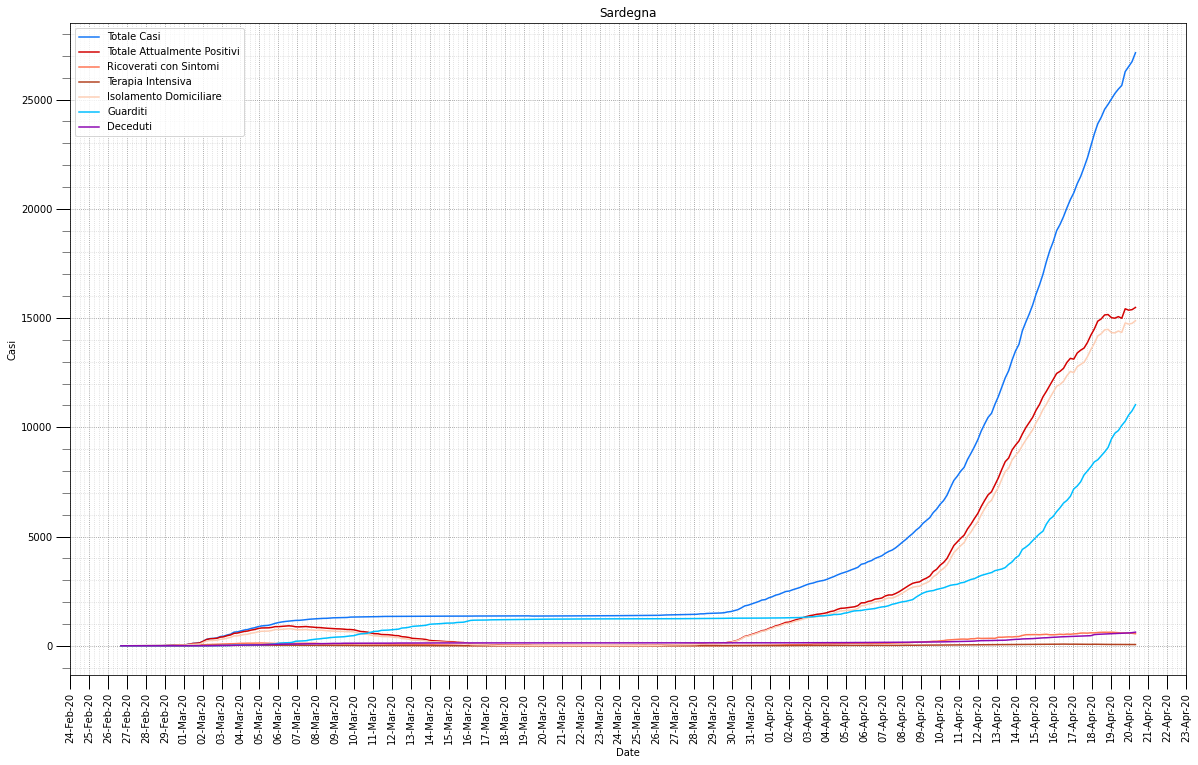

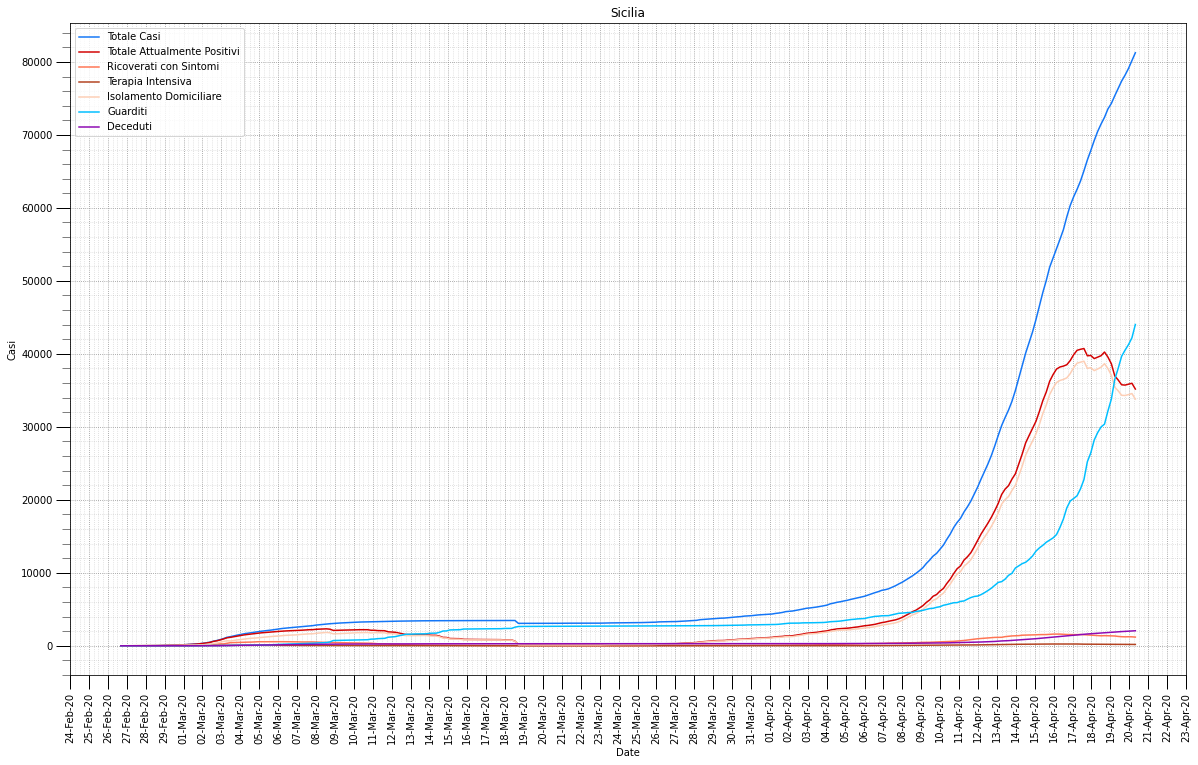

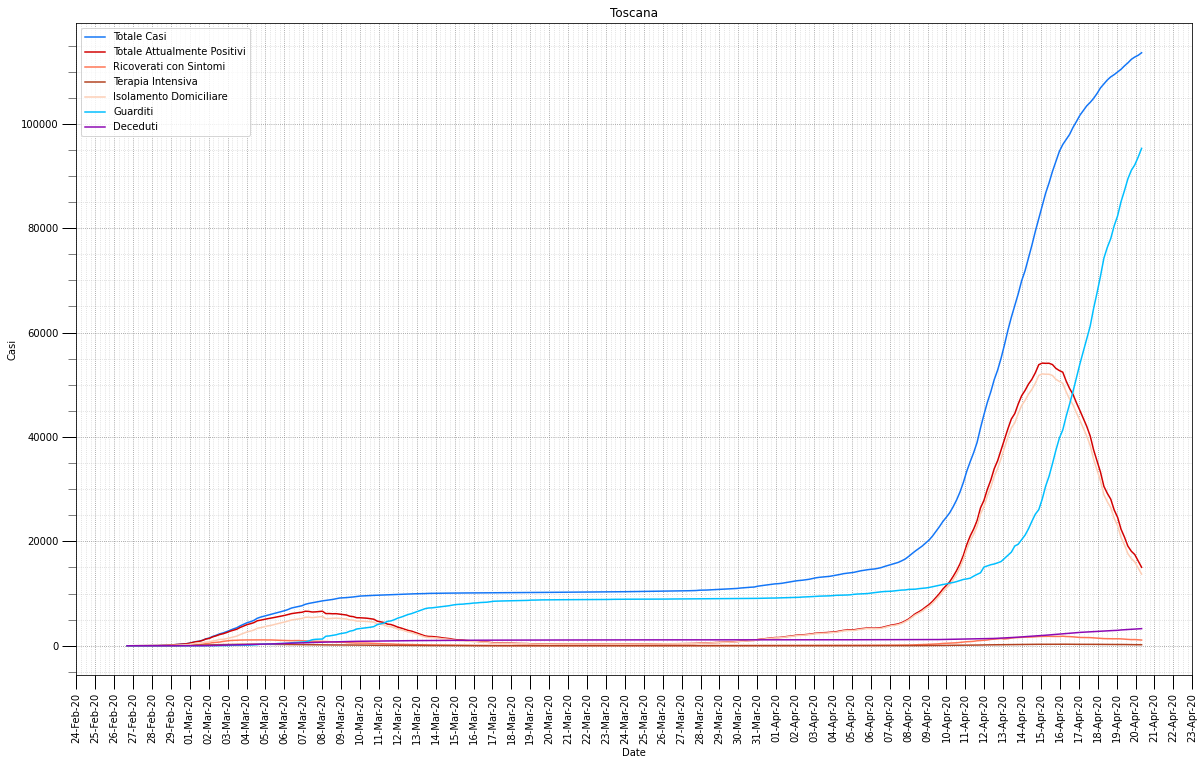

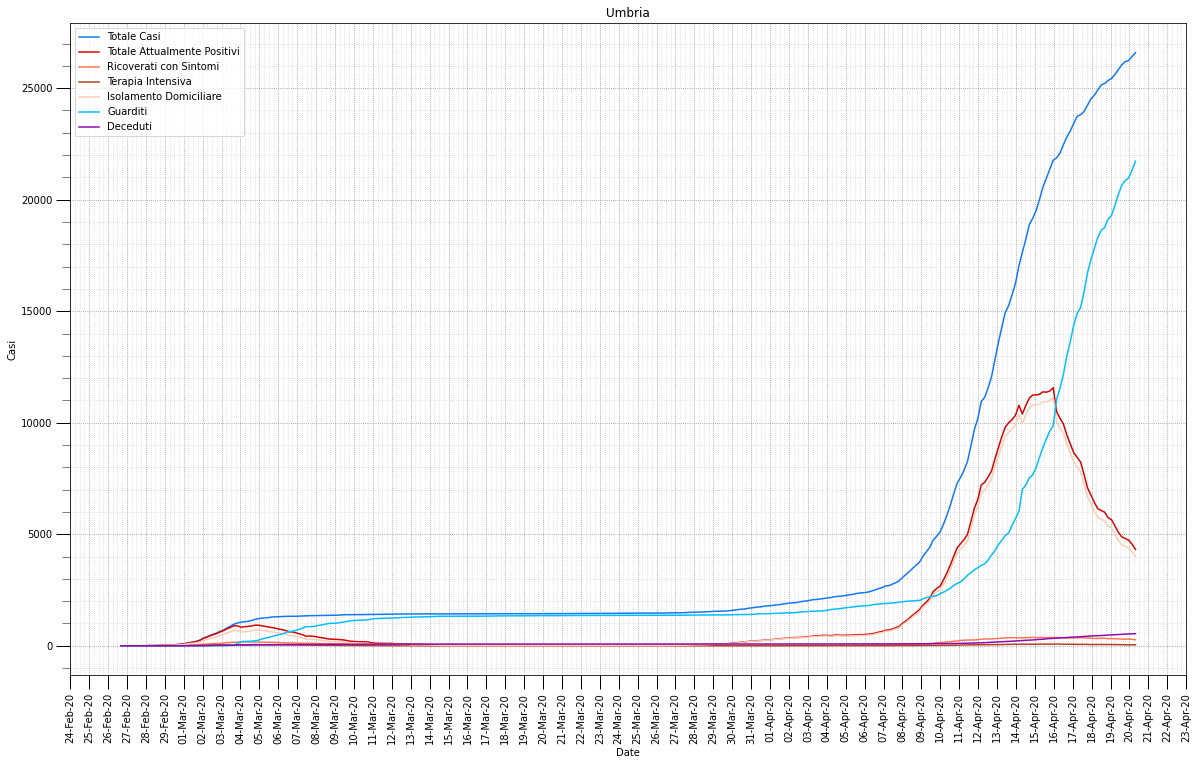

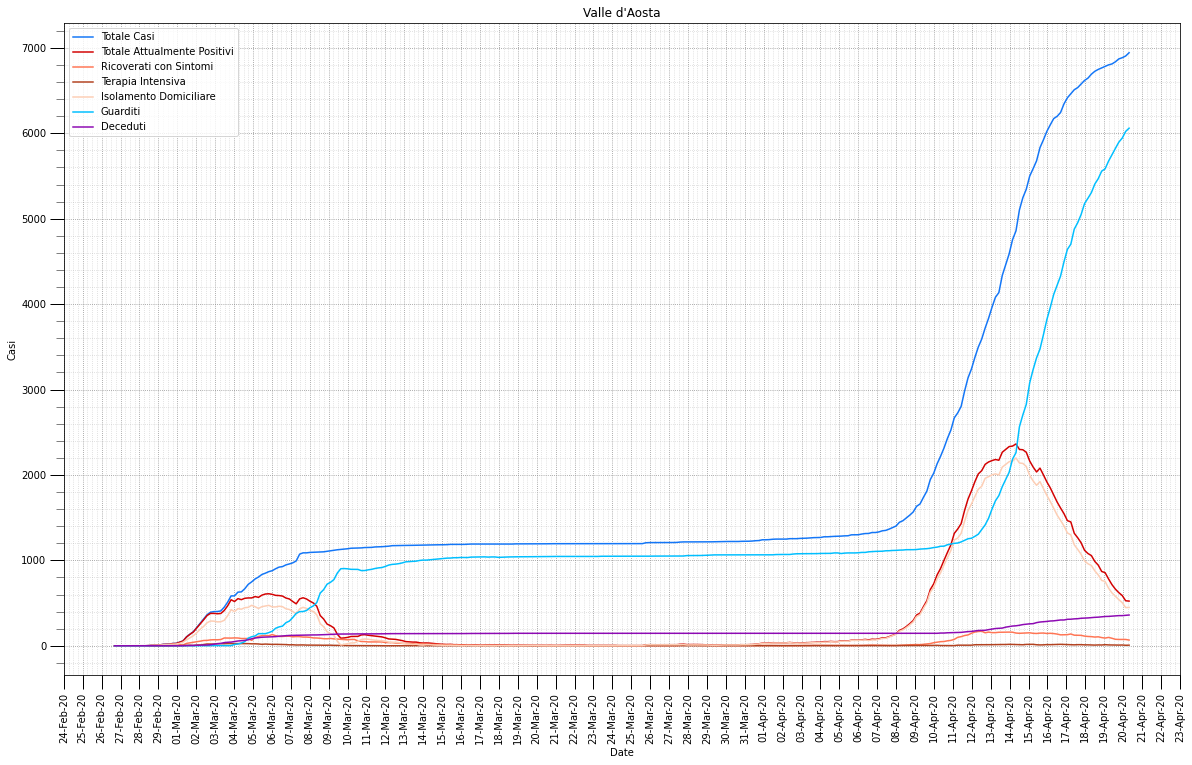

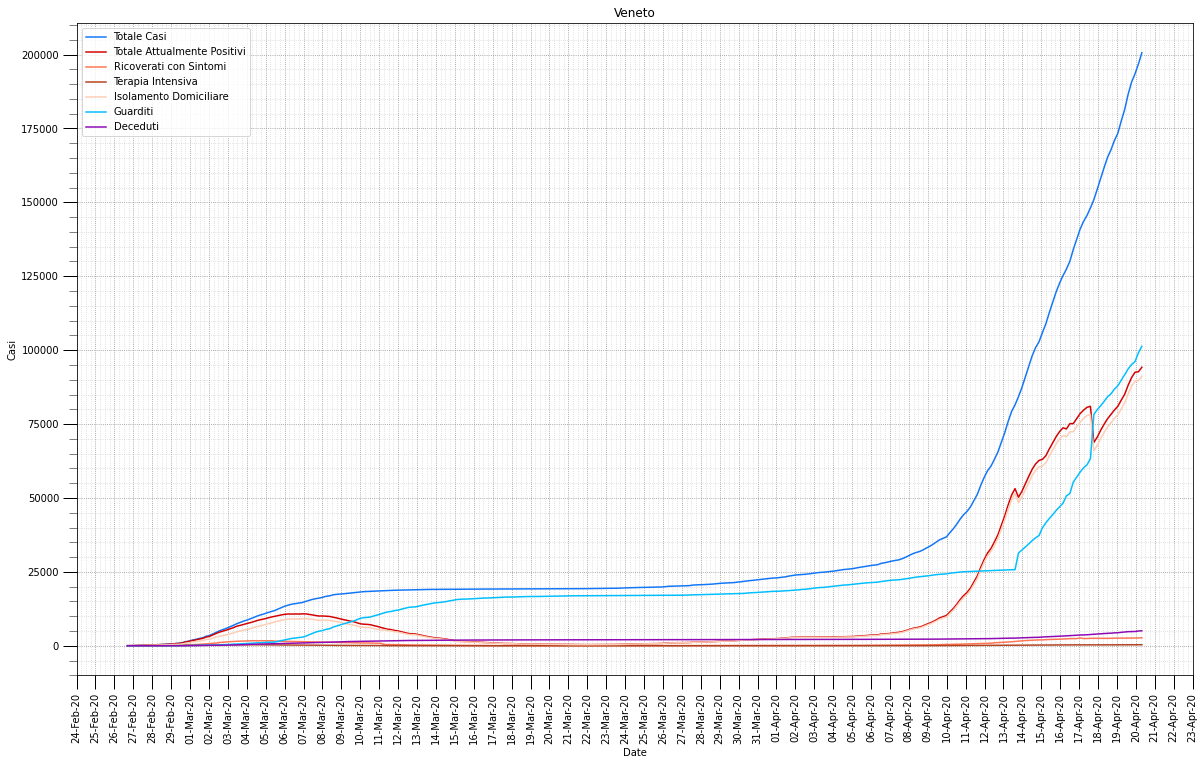

In [141]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[11:]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)